In [1]:
import pandas as pd
import numpy as np

In [2]:
armstrong_data = []
prime_data = []
BASENAME = "V3_sub{}.xlsx"
ARMSTRONG_DIR = "./data/armstrong_dataset/"
PRIME_DIR = "./data/prime_dataset/"
NUM_SUBJECTS = 4

In [3]:
for sub in range(1,NUM_SUBJECTS+1):
    filename = ARMSTRONG_DIR + BASENAME.format(sub)
    armstrong_data.append(pd.read_excel(filename))
    filename = PRIME_DIR + BASENAME.format(sub)
    prime_data.append(pd.read_excel(filename))

In [4]:
#percent lines in sequence
def get_percent_lines_in_seq(data):
    data = np.array(data)
    count = 0
    last_line = 0
    total_lines = 0
    for line in data:
        if line[1]==0:
            continue
        if line[1] != last_line:
            total_lines += 1
        if line[1] == last_line+1:
            count += 1
        last_line = line[1]
    print(count, total_lines)
    return count, total_lines, count/total_lines

In [5]:
armstrong_perc_in_seq = []
prime_perc_in_seq = []
for sub in range(NUM_SUBJECTS):
    armstrong_perc_in_seq.append(get_percent_lines_in_seq(armstrong_data[sub]))
    prime_perc_in_seq.append(get_percent_lines_in_seq(prime_data[sub]))
print("Armstrong\nInSeq Total Percentage")
print(armstrong_perc_in_seq)
print("Prime\nInSeq Total Percentage")
print(prime_perc_in_seq)

199 746
106 390
128 645
57 212
85 283
137 364
162 516
155 498
Armstrong
InSeq Total Percentage
[(199, 746, 0.2667560321715818), (128, 645, 0.19844961240310077), (85, 283, 0.3003533568904594), (162, 516, 0.313953488372093)]
Prime
InSeq Total Percentage
[(106, 390, 0.2717948717948718), (57, 212, 0.2688679245283019), (137, 364, 0.37637362637362637), (155, 498, 0.3112449799196787)]


In [6]:
def get_seq_map(data):
    data = np.array(data)
    counts = {}
    last_line = 0
    total_lines = 0
    for line in data:
        if line[0]==0:
            continue
        if line[1] != last_line:
            total_lines += 1
        if line[1] == last_line+1:
            if line[1] not in counts:
                counts[line[1]] = 0
            counts[line[1]] += 1
        last_line = line[1]
    return counts, total_lines

In [7]:
armstrong_seq_maps = []
prime_seq_maps = []
for sub in range(NUM_SUBJECTS):
    armstrong_seq_maps.append(get_seq_map(armstrong_data[sub]))
    prime_seq_maps.append(get_seq_map(prime_data[sub]))

In [8]:
LINES_ARMSTRONG = 32
LINES_PRIME = 41
armstrong_tok_analysis = []
prime_tok_analysis = []

for m, total in armstrong_seq_maps:
    armstrong_line_ct = np.zeros(LINES_ARMSTRONG)
    for k,v in m.items():
        armstrong_line_ct[k] = v/total
    armstrong_tok_analysis.append(armstrong_line_ct)
for m, total in prime_seq_maps:
    prime_line_ct = np.zeros(LINES_PRIME)
    for k,v in m.items():
        prime_line_ct[k] = v/total
    prime_tok_analysis.append(prime_line_ct)
armstrong_tok_analysis, prime_tok_analysis

([array([ 0.        ,  0.00158983,  0.00079491,  0.00238474,  0.00317965,
          0.        ,  0.        ,  0.00556439,  0.01192369,  0.00158983,
          0.00476948,  0.00397456,  0.01351351,  0.00476948,  0.        ,
          0.        ,  0.00238474,  0.0063593 ,  0.01589825,  0.01351351,
          0.        ,  0.00079491,  0.00079491,  0.        ,  0.00079491,
          0.00079491,  0.        ,  0.        ,  0.        ,  0.00079491,
          0.00476948,  0.00794913]),
  array([ 0.        ,  0.00642792,  0.00275482,  0.00367309,  0.00183655,
          0.        ,  0.        ,  0.00367309,  0.00642792,  0.00275482,
          0.00275482,  0.00826446,  0.00642792,  0.00091827,  0.        ,
          0.        ,  0.        ,  0.00091827,  0.00091827,  0.        ,
          0.        ,  0.        ,  0.00367309,  0.        ,  0.00091827,
          0.00091827,  0.00091827,  0.        ,  0.00918274,  0.01285583,
          0.00367309,  0.        ]),
  array([ 0.        ,  0.00606061,  0.

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
plt.figure(figsize=(30,30))
for sub in range(NUM_SUBJECTS):
    plt.bar(np.arange(LINES_ARMSTRONG)+sub*0.2,armstrong_tok_analysis[sub],width=0.2)

In [11]:
plt.figure(figsize=(30,30))
for sub in range(NUM_SUBJECTS):
    plt.bar(np.arange(LINES_PRIME)+sub*0.2,prime_tok_analysis[sub],width=0.2)

In [23]:
def get_gaze_time(data):
    data = np.array(data)
    last_line = 0
    gaze = 0
    ans = []
    for line in data:
        if line[1] == 0:
            continue
        if line[1] != last_line:
            ans.append((last_line,gaze))
            last_line = line[1]
            gaze = line[5] - line[4] + 1
        else:
            gaze += line[5] - line[4] + 1
    ans.append((last_line,gaze))
    return ans[1:]

In [24]:
armstrong_gaze_times = []
prime_gaze_times = []
for sub in range(NUM_SUBJECTS):
    armstrong_gaze_times.append(get_gaze_time(armstrong_data[sub]))
    prime_gaze_times.append(get_gaze_time(prime_data[sub]))

In [25]:
armstrong_gaze_times, prime_gaze_times

([[(2, 1),
   (3, 1),
   (2, 1),
   (3, 1),
   (2, 1),
   (1, 126),
   (2, 1),
   (1, 1),
   (3, 435),
   (7, 62),
   (8, 1),
   (6, 1),
   (7, 218),
   (16, 1),
   (28, 1),
   (25, 1),
   (4, 94),
   (3, 1),
   (4, 65),
   (3, 1),
   (2, 1),
   (1, 2),
   (4, 1),
   (3, 132),
   (4, 31),
   (3, 94),
   (4, 33),
   (2, 1),
   (3, 277),
   (4, 1),
   (3, 1),
   (7, 156),
   (8, 1),
   (3, 1),
   (4, 1),
   (3, 226),
   (7, 279),
   (6, 32),
   (7, 33),
   (8, 1),
   (7, 33),
   (8, 1),
   (7, 33),
   (8, 2),
   (7, 184),
   (6, 2),
   (7, 1),
   (8, 1),
   (7, 307),
   (8, 34),
   (7, 1),
   (8, 91),
   (7, 310),
   (8, 33),
   (10, 1),
   (8, 2),
   (12, 124),
   (11, 1),
   (12, 1),
   (11, 30),
   (12, 62),
   (13, 62),
   (9, 2),
   (10, 1),
   (9, 2),
   (10, 61),
   (9, 32),
   (10, 32),
   (8, 4),
   (7, 152),
   (10, 2),
   (11, 2),
   (12, 2),
   (11, 31),
   (12, 1),
   (11, 1),
   (12, 32),
   (11, 1),
   (12, 91),
   (11, 1),
   (12, 124),
   (13, 1),
   (12, 93),
   (13, 34

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
IMP_LINES_ARMSTRONG = [11,12,13,16,17,18,19,29,30]
IMP_LINES_PRIME = [9,12,15,18,19,31,33,35]

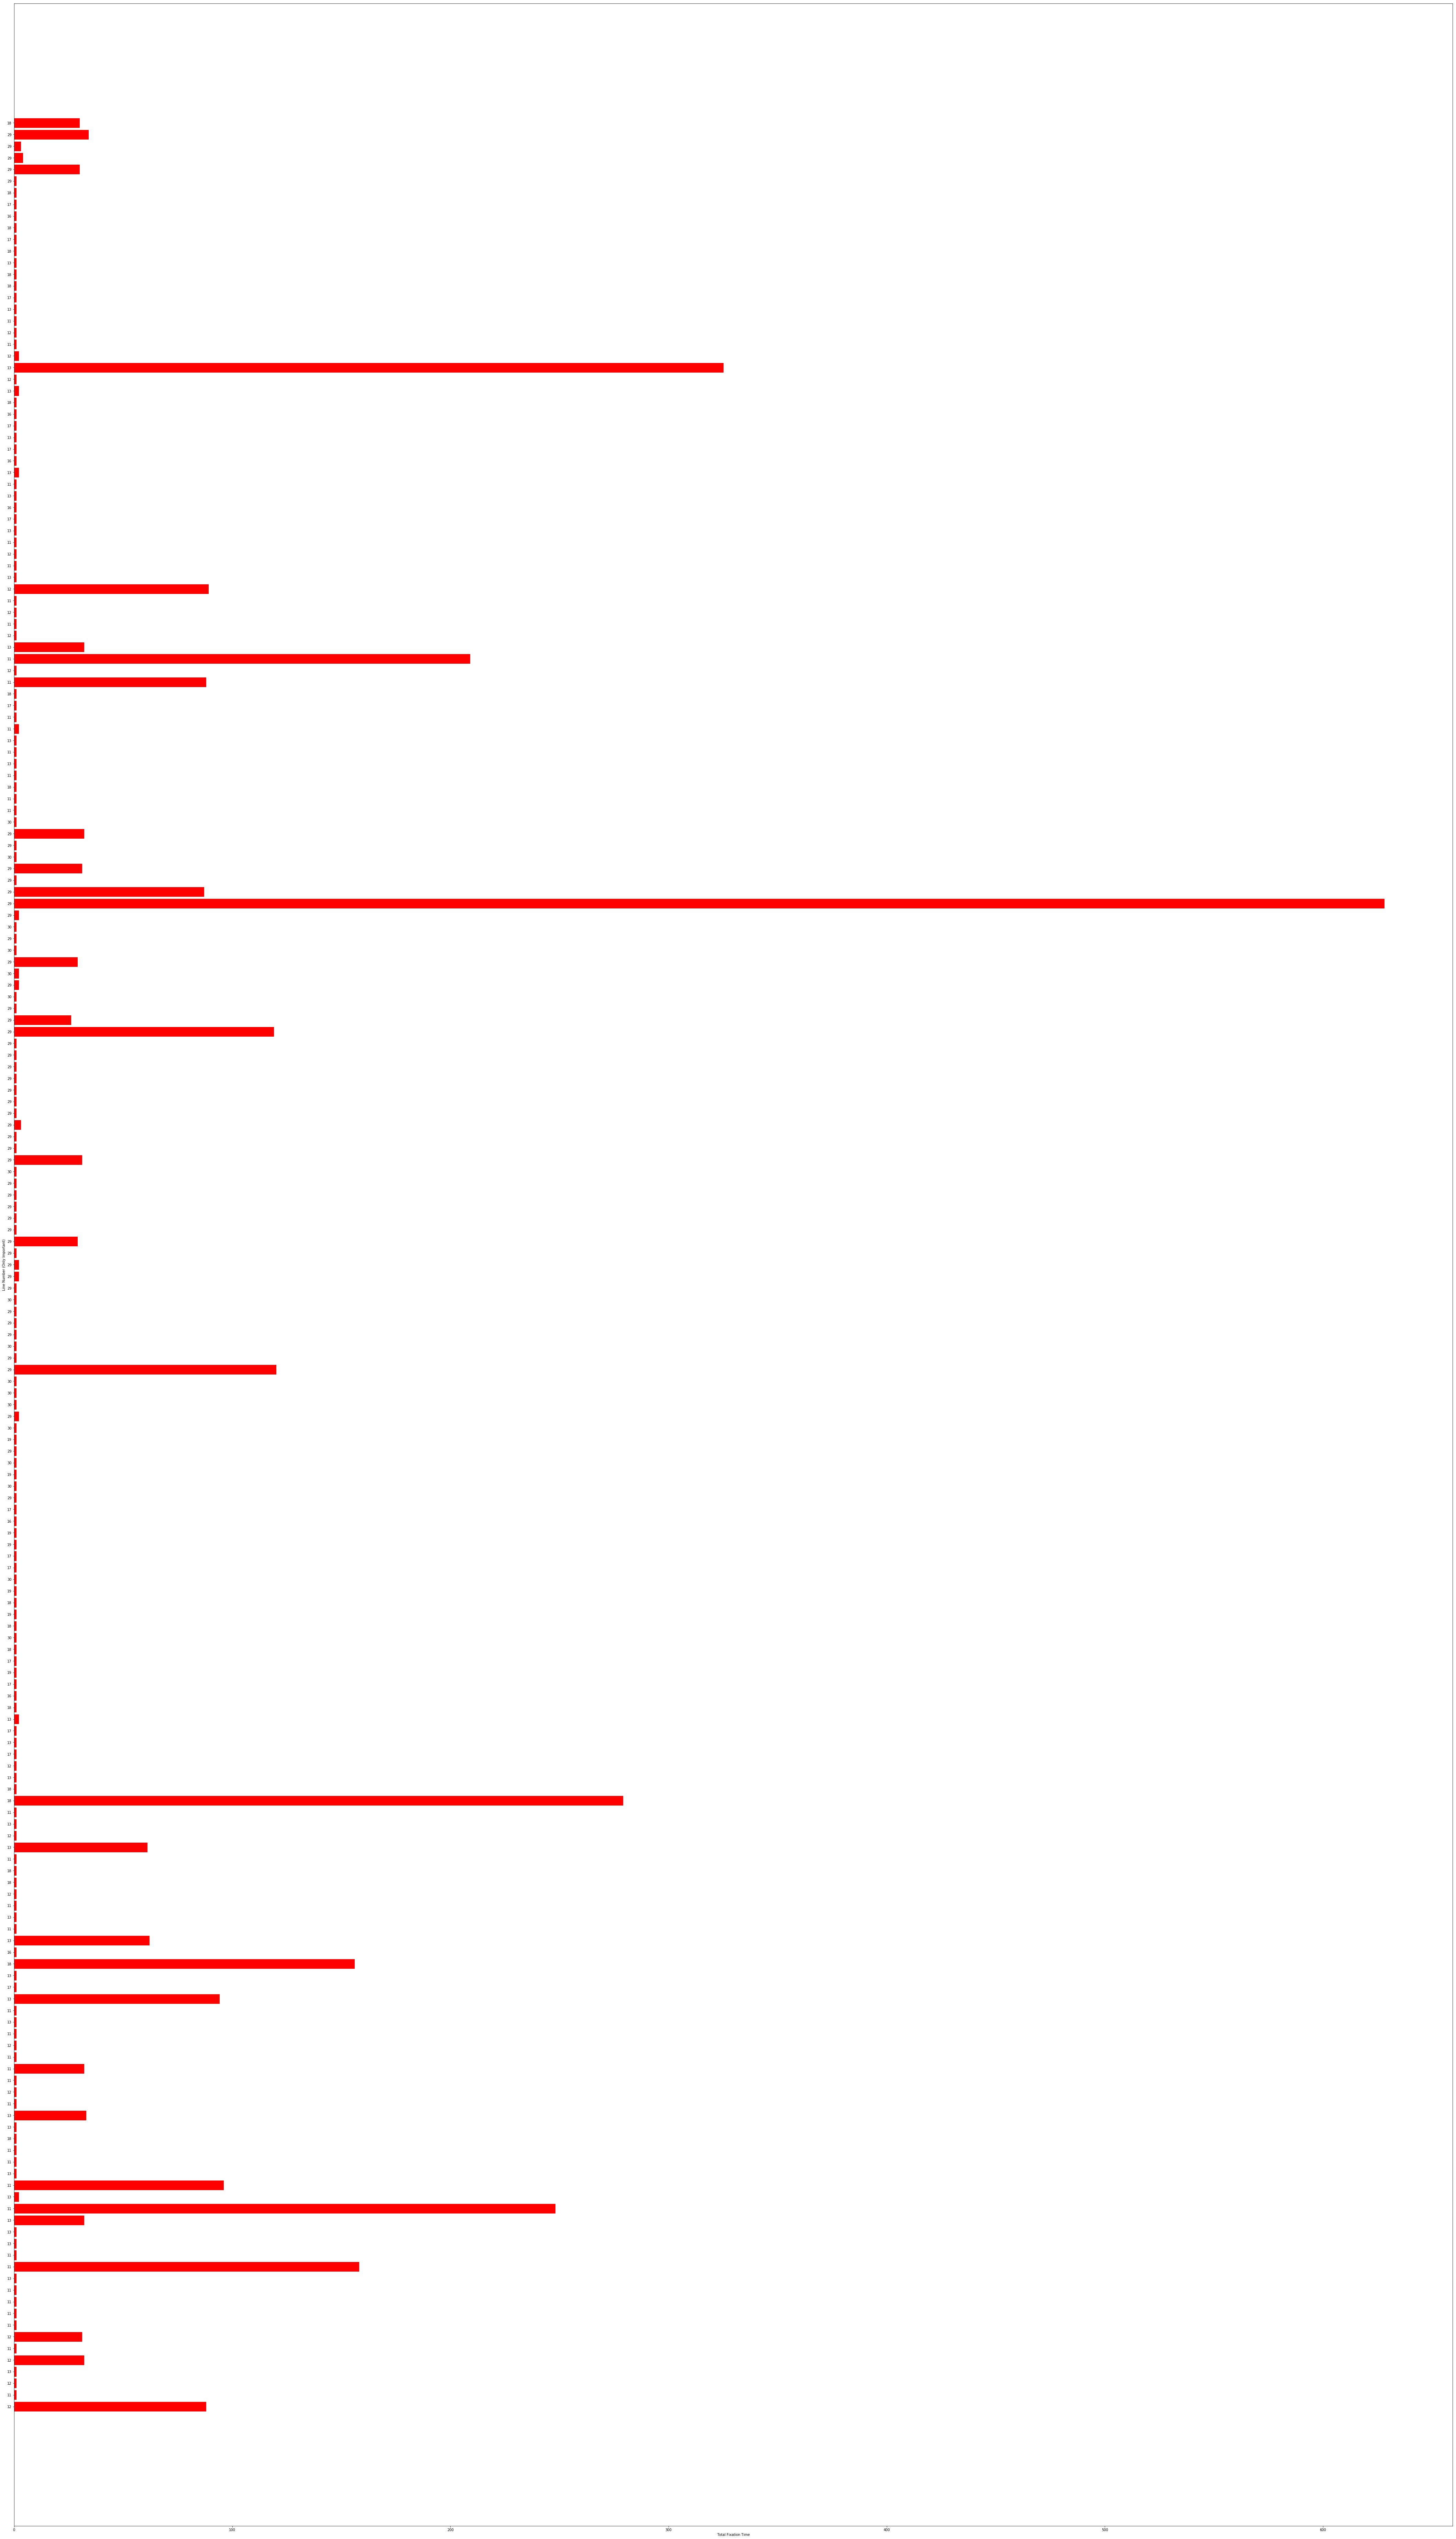

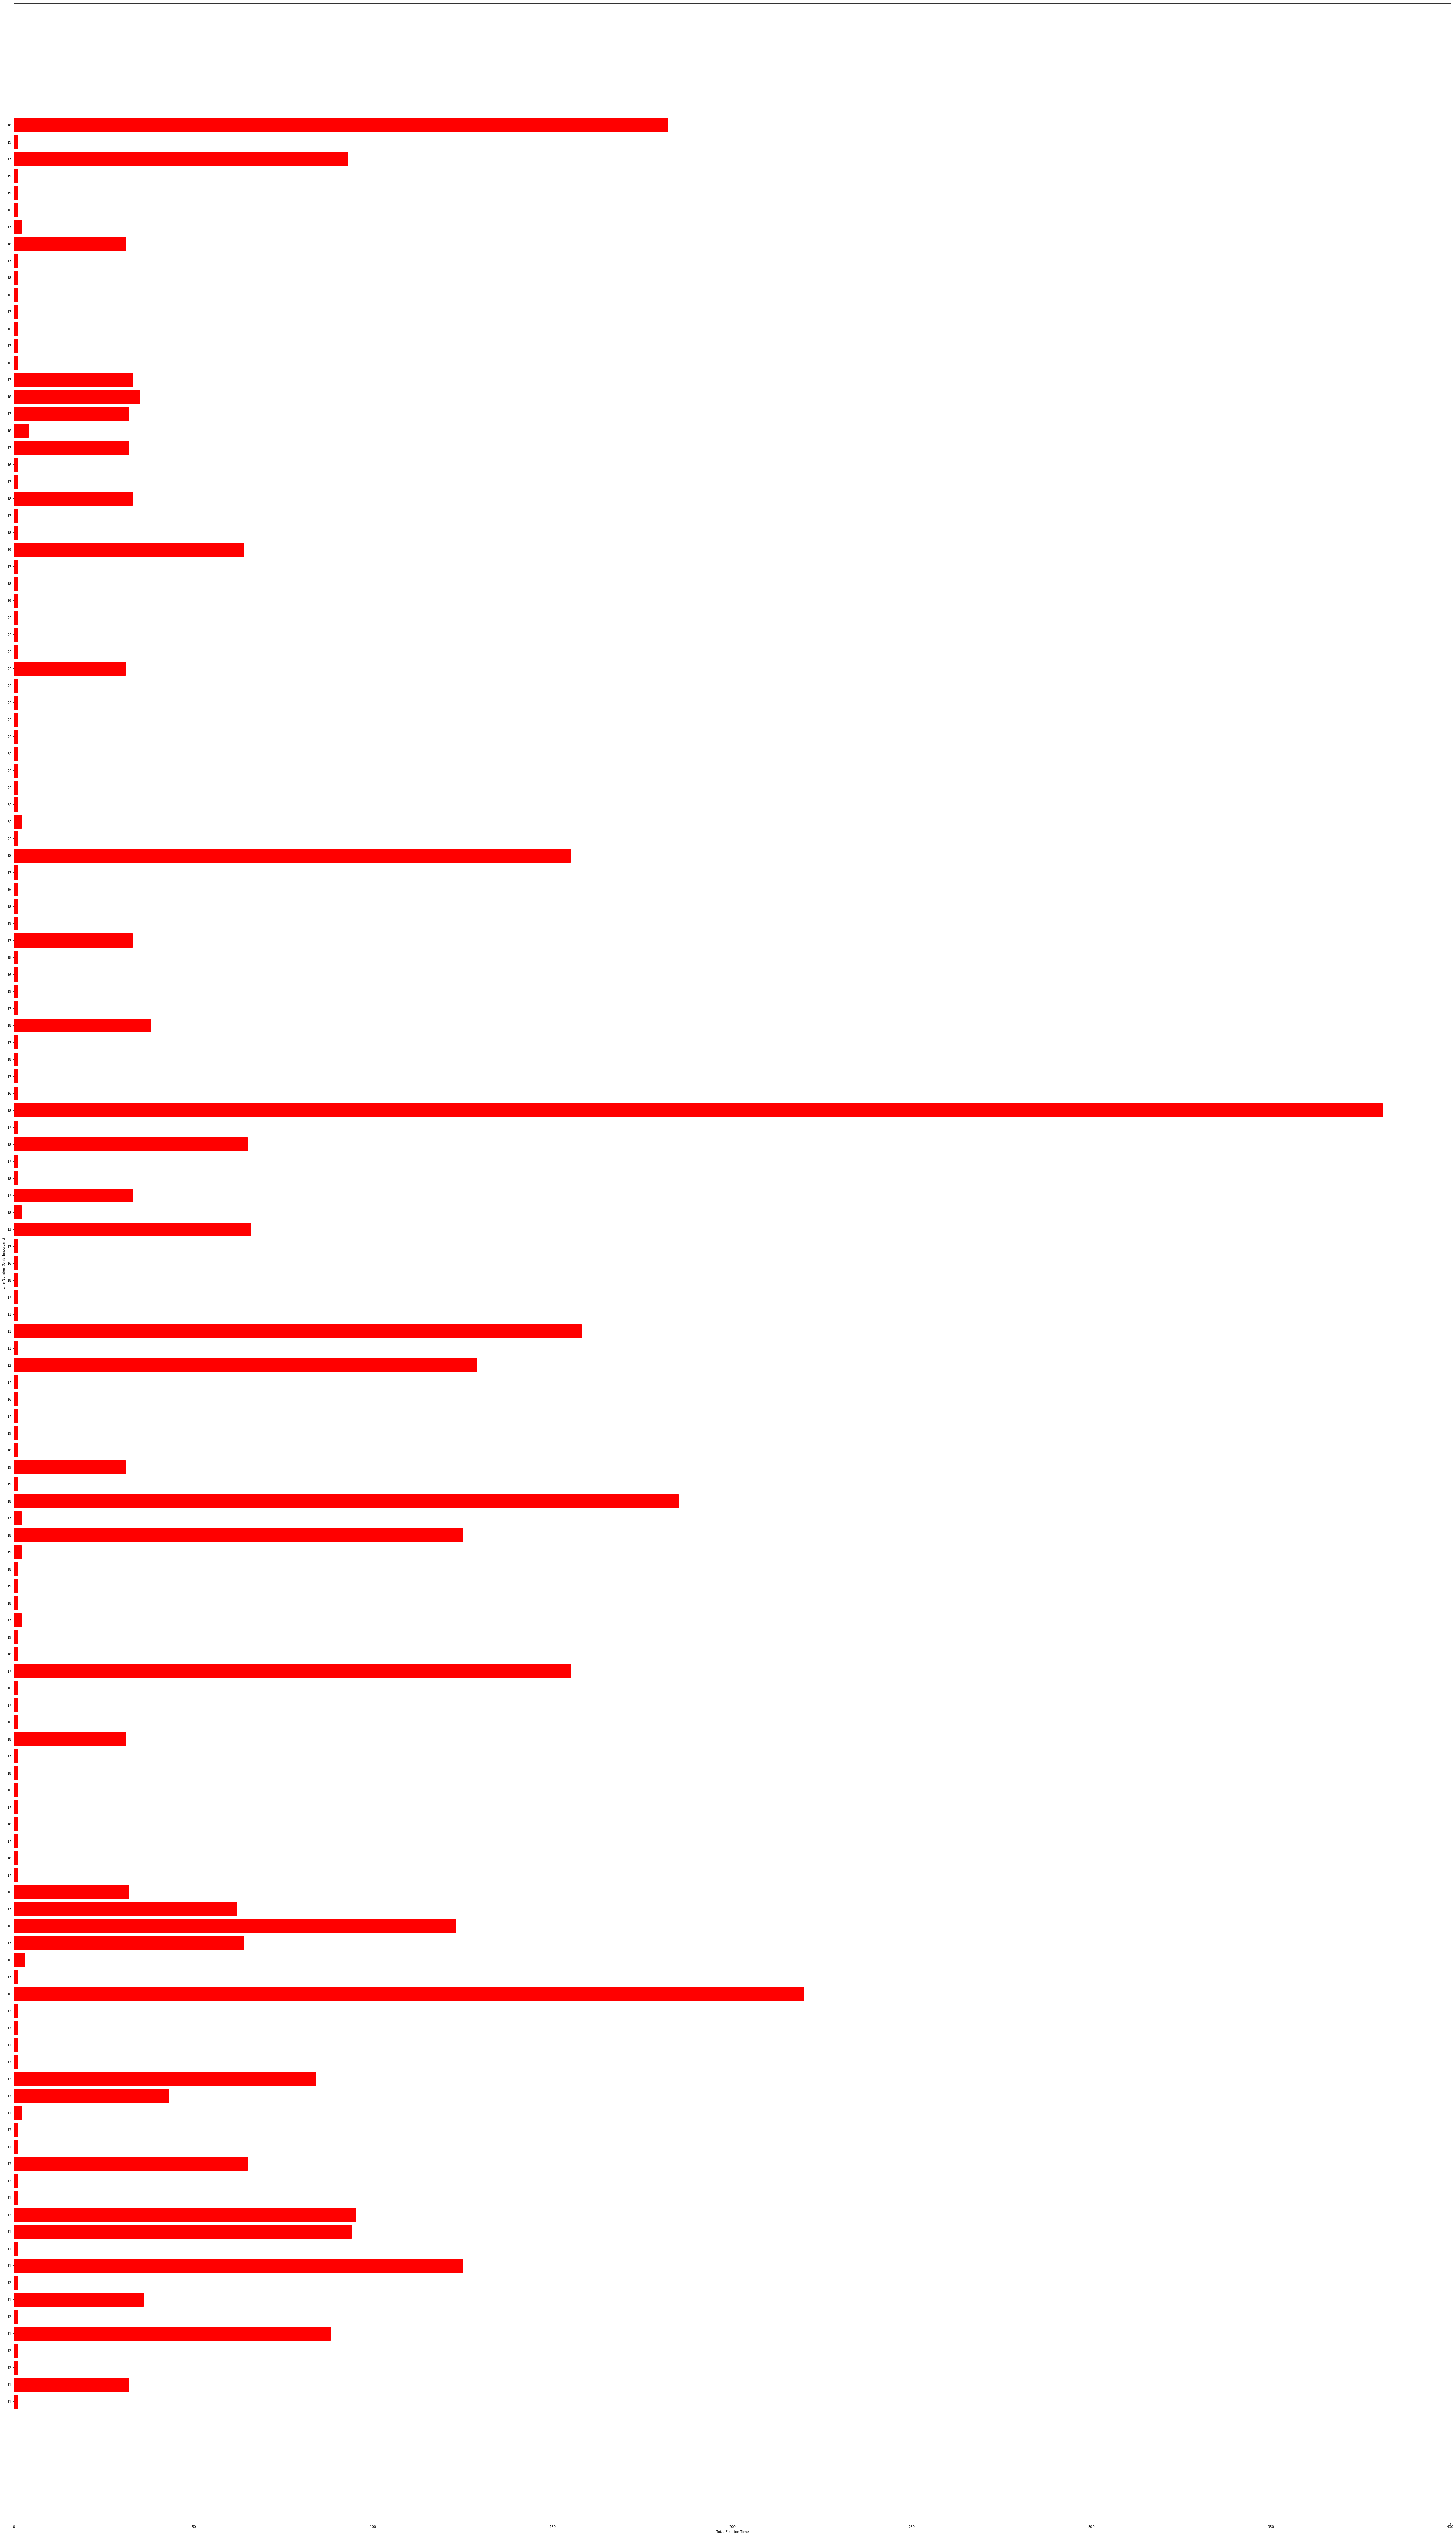

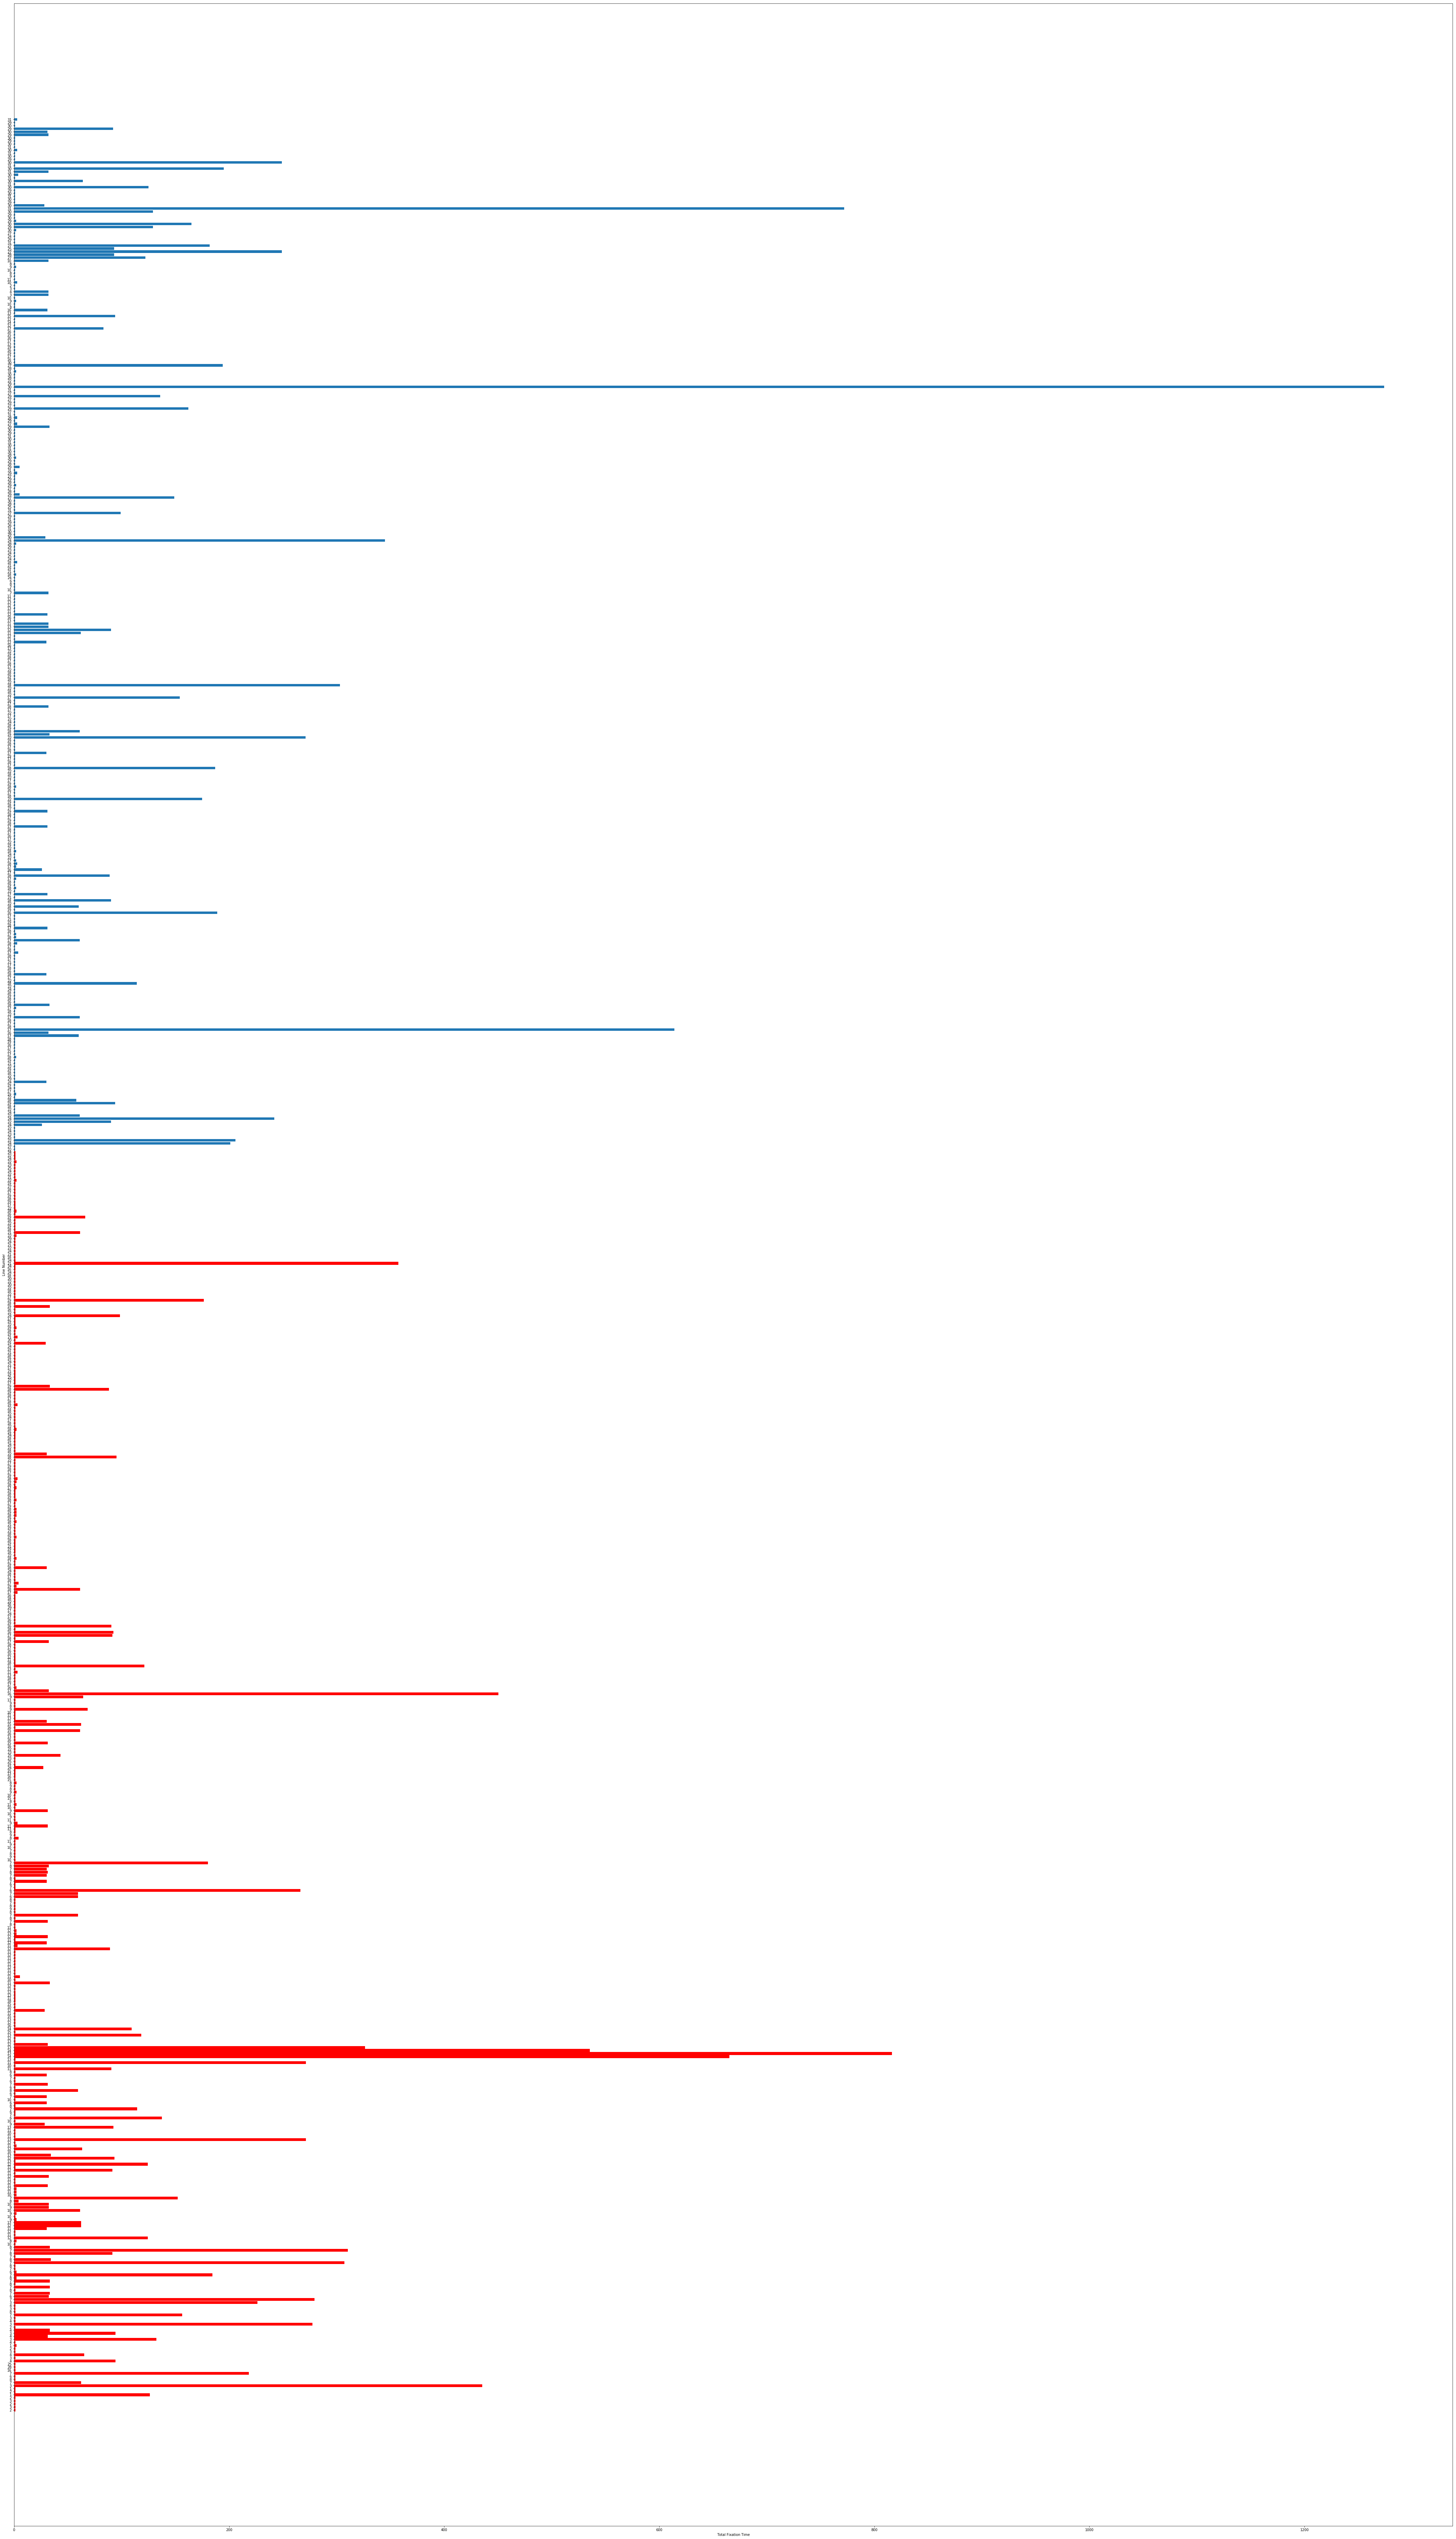

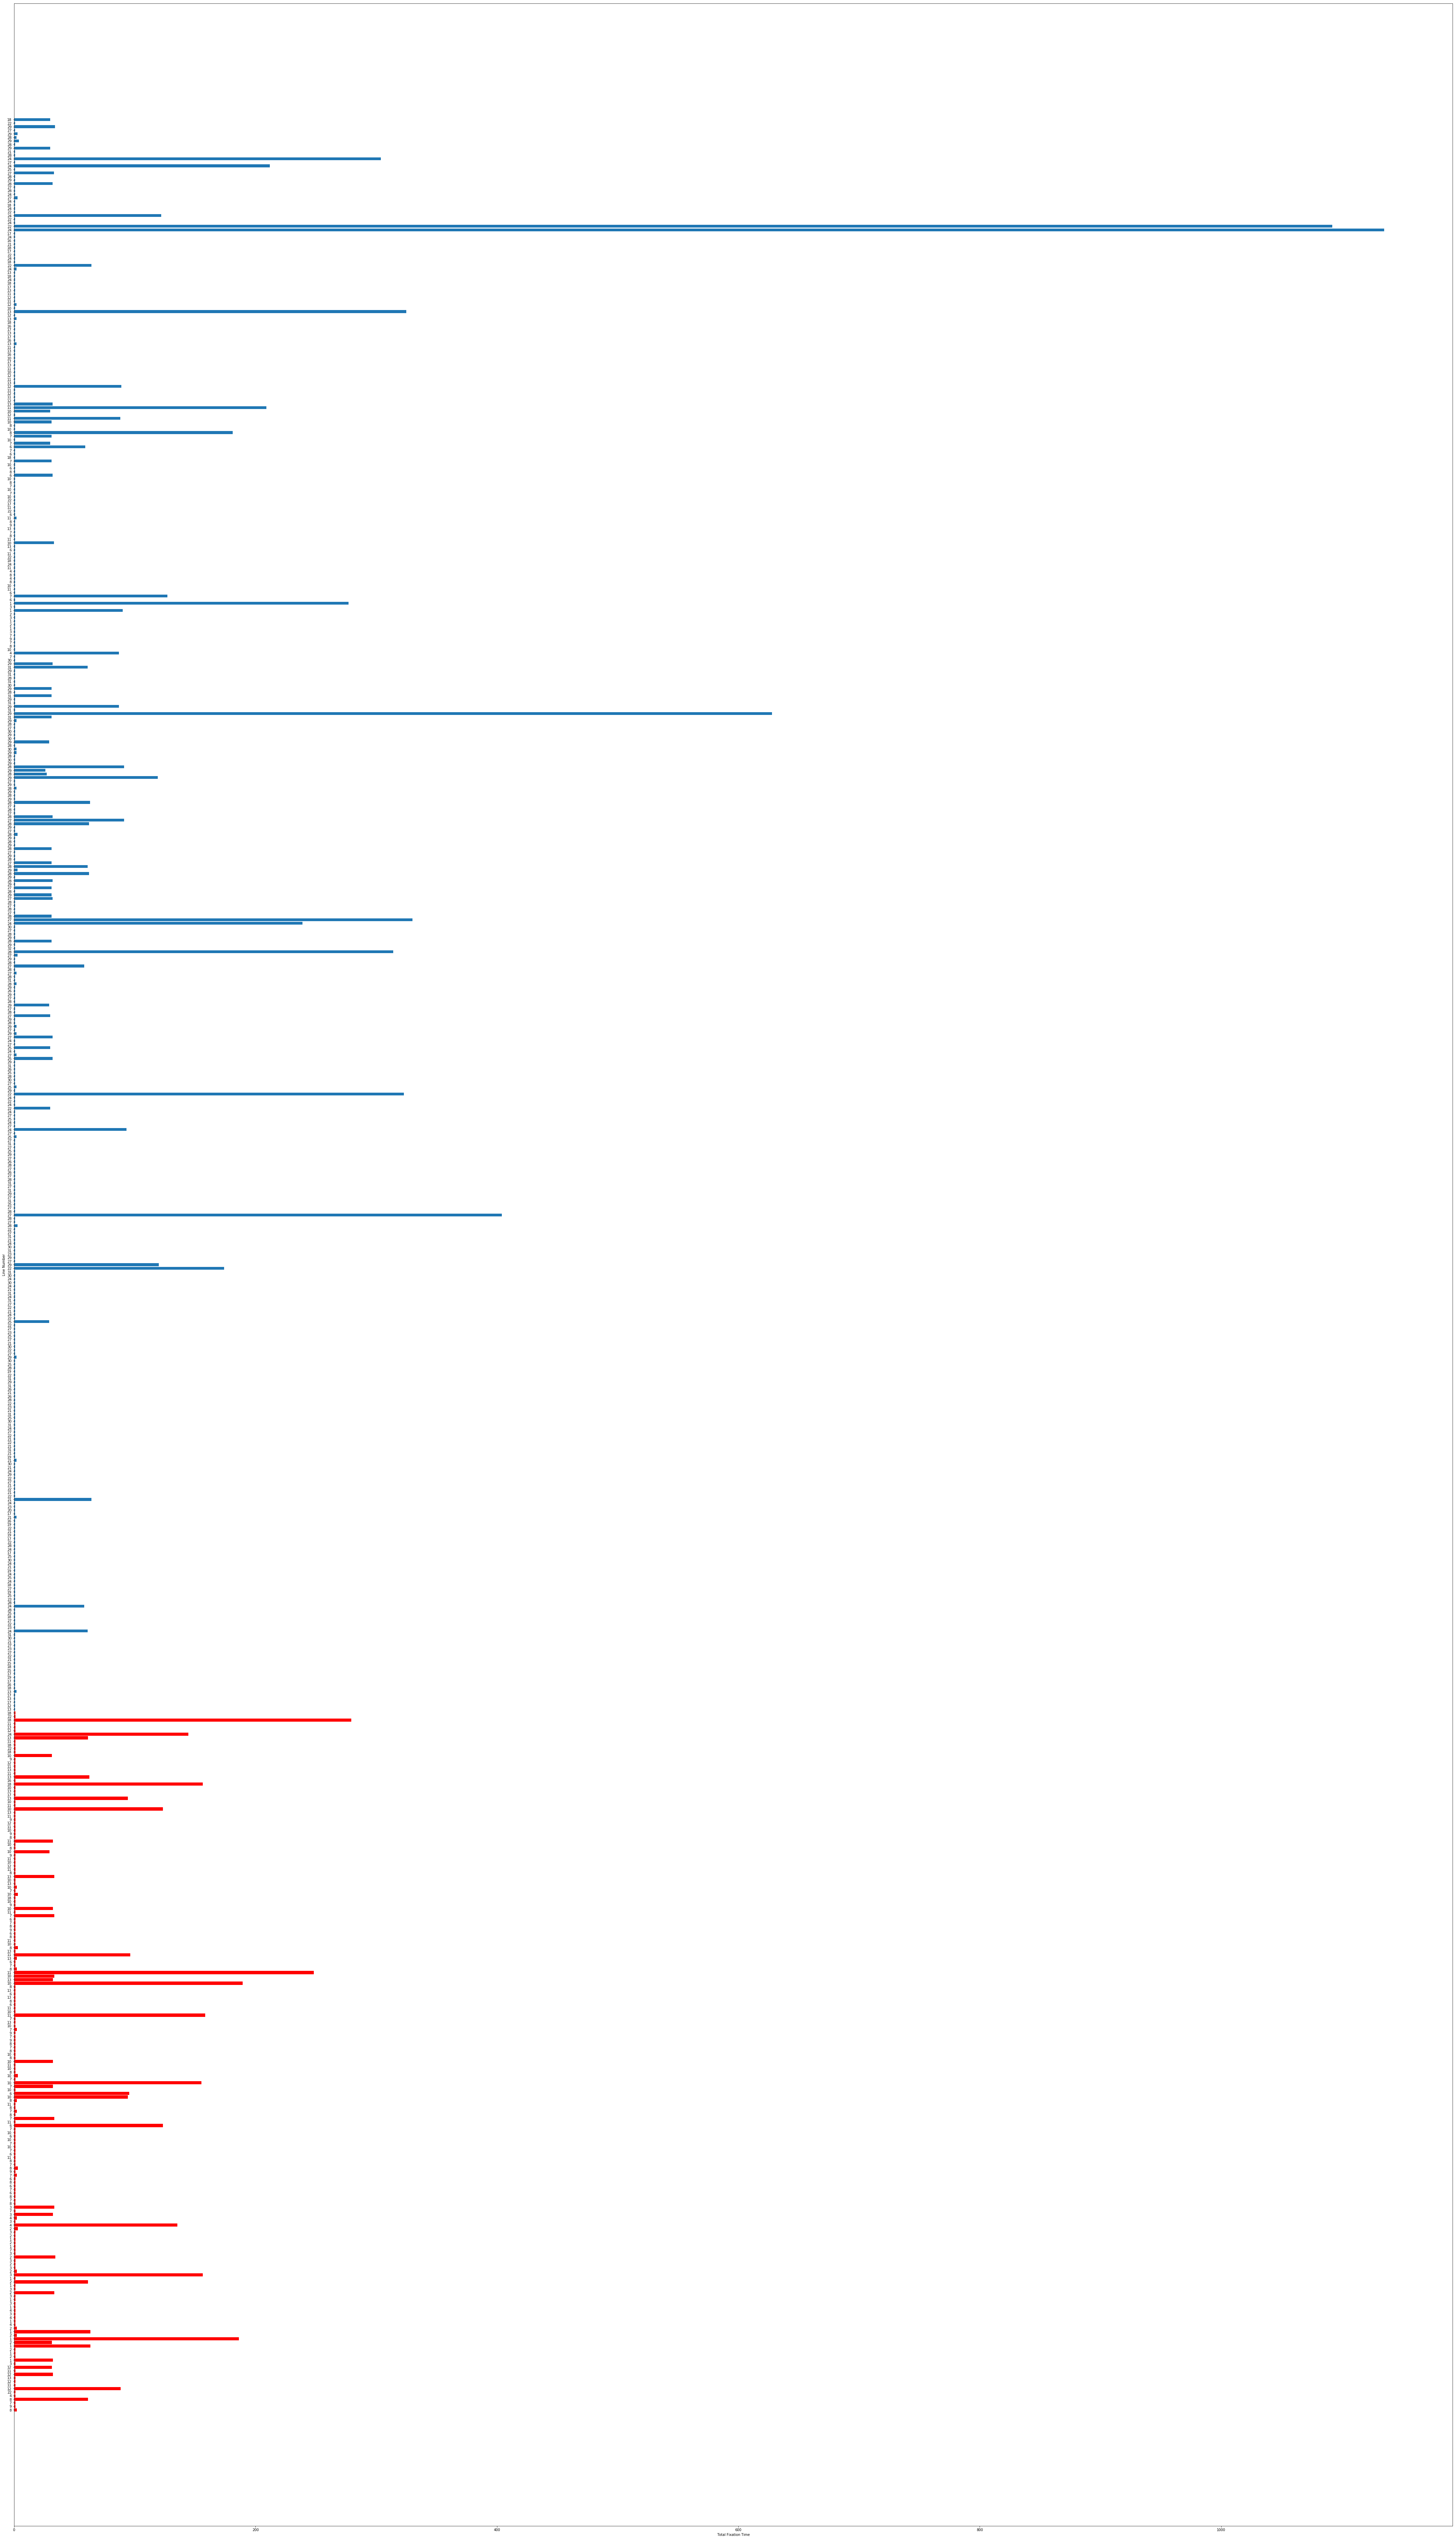

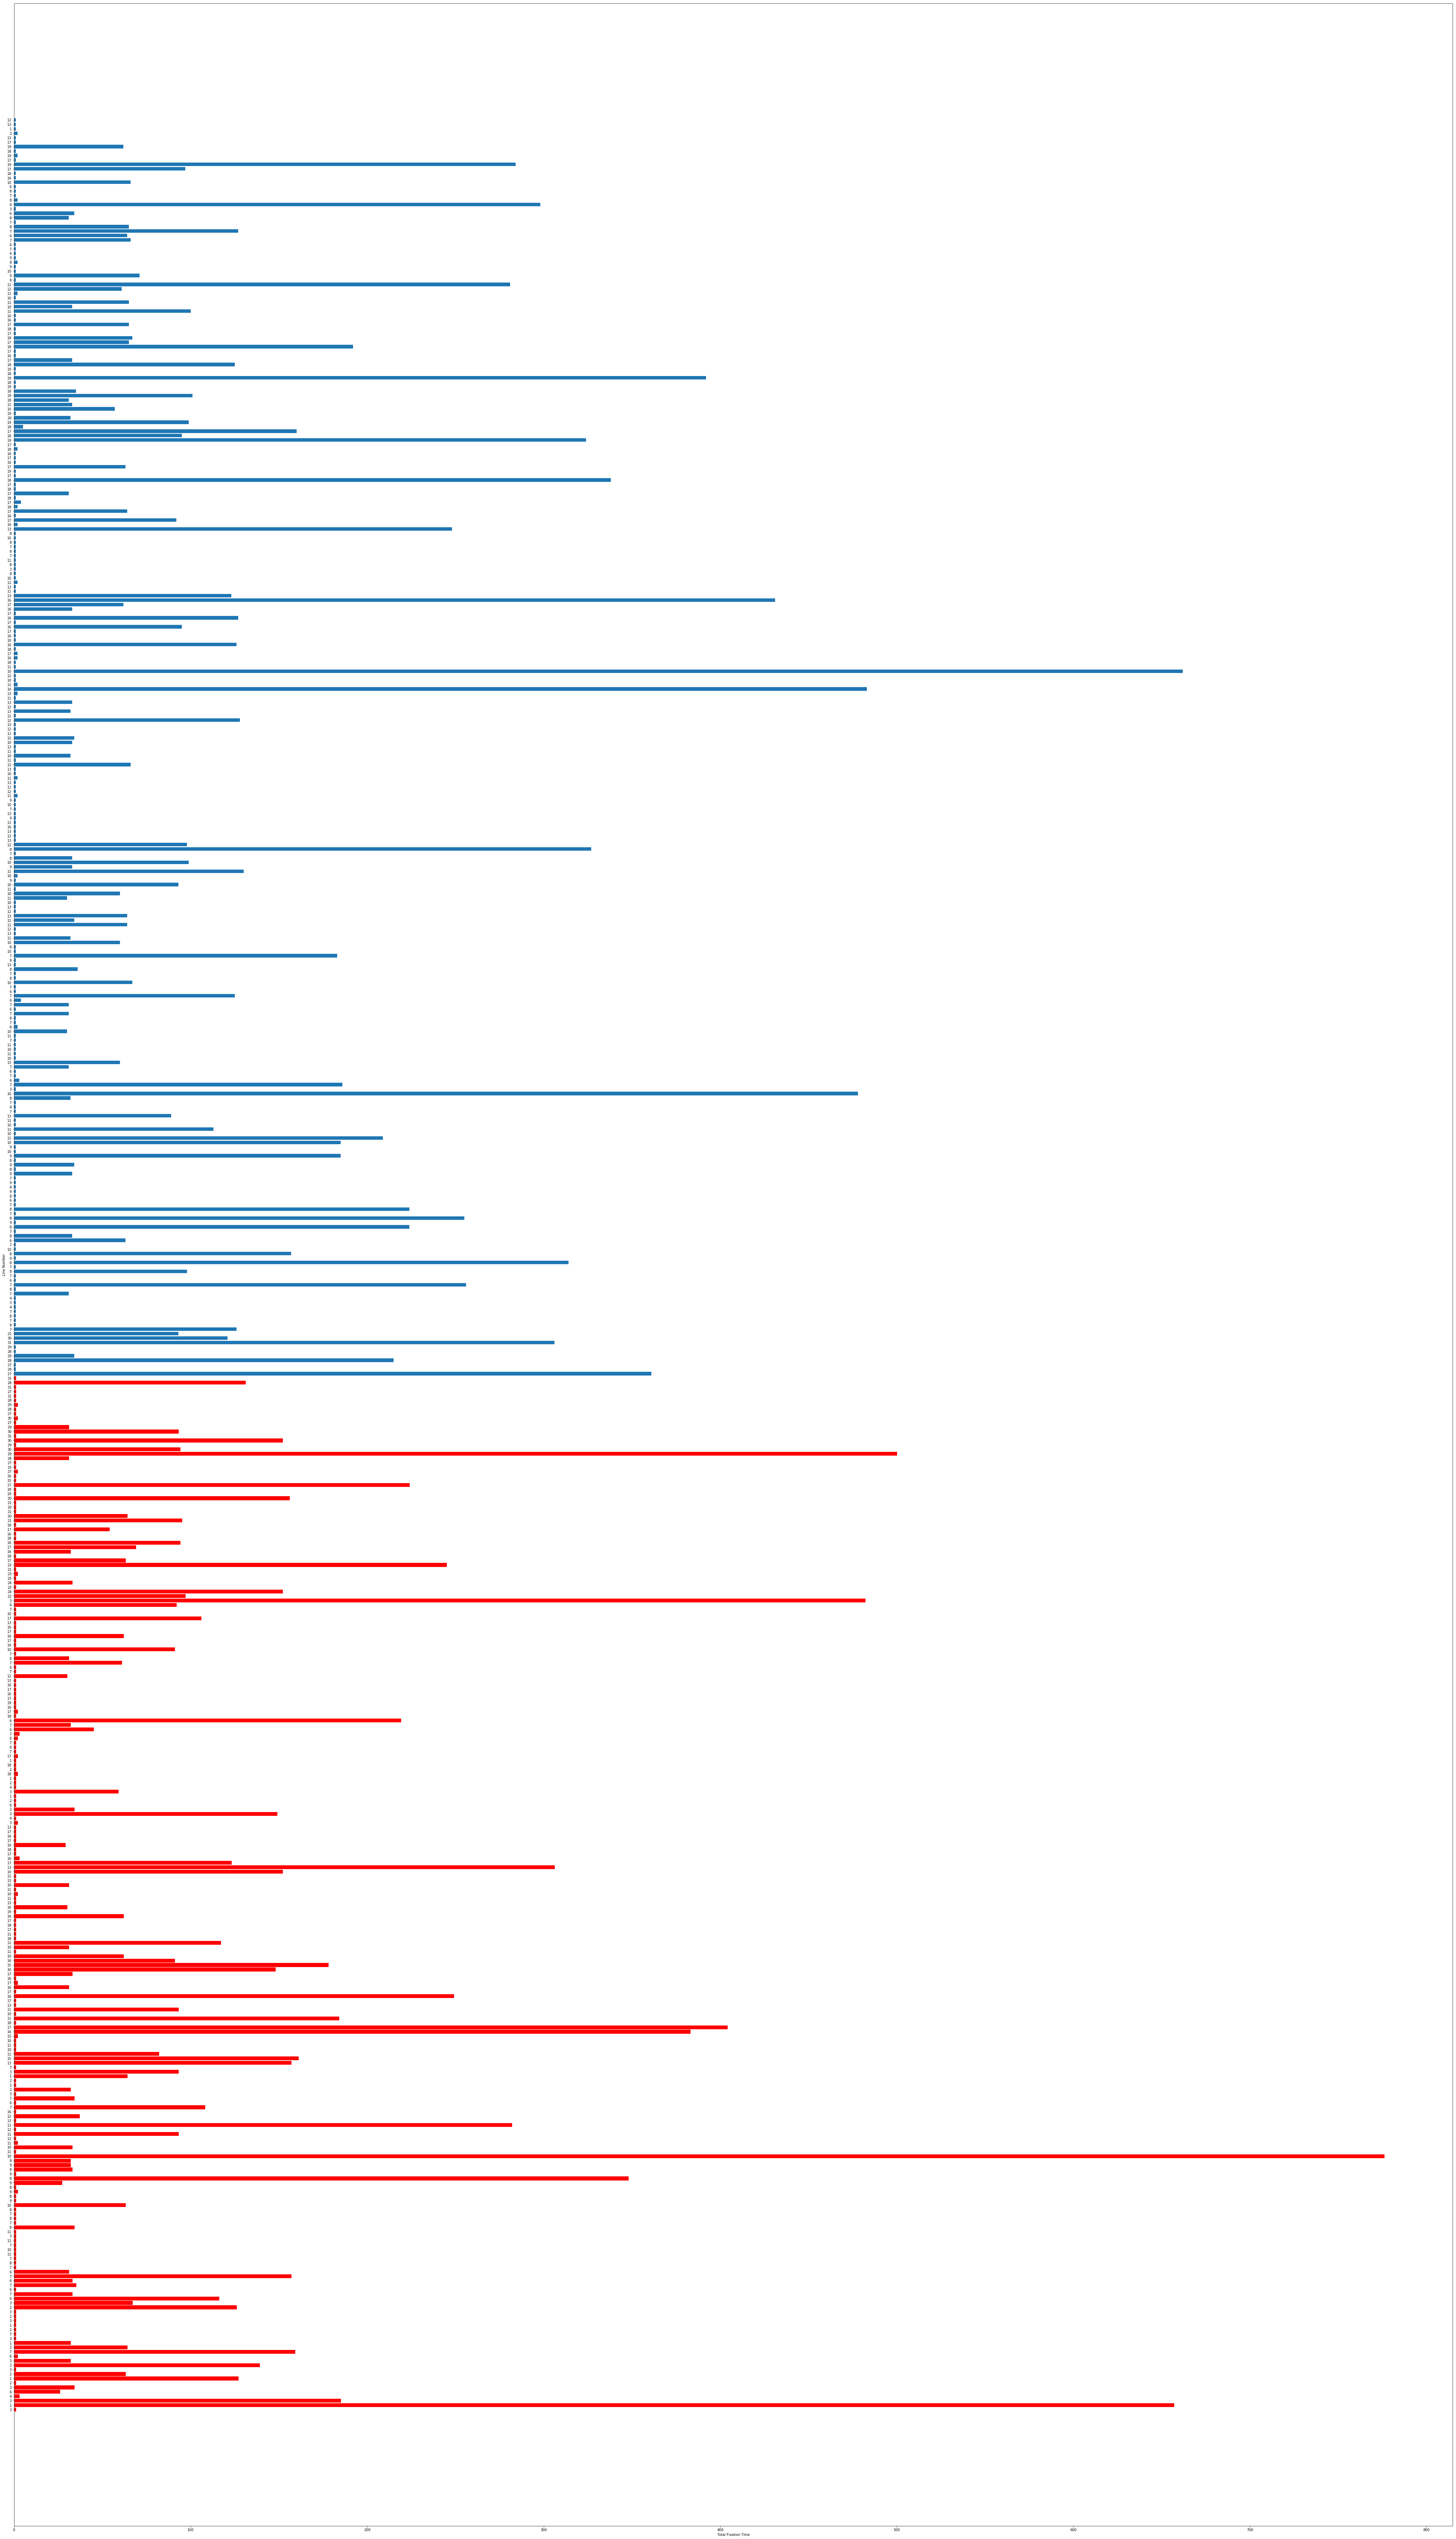

In [42]:
for sub in range(NUM_SUBJECTS):
    plt.figure(figsize=(75,135))
    xs = [x for x,y in armstrong_gaze_times[sub] if x in IMP_LINES_ARMSTRONG]
    ys = [y for x,y in armstrong_gaze_times[sub] if x in IMP_LINES_ARMSTRONG]
    plt.xlabel("Total Fixation Time")
    plt.ylabel("Line Number (Only Important)")
    rects = plt.barh(range(len(xs)),ys,tick_label=xs)
    i = 0
    for x,y in armstrong_gaze_times[sub]:
        if y == 0:
            continue
        if x in IMP_LINES_ARMSTRONG:
            rects[i].set_color('r')
        else:
            continue
        i+=1
    plt.savefig("./plots/gazetimes/armstrong/gaze_times_arms_imp{}.png".format(sub+1))
for sub in range(NUM_SUBJECTS):
    plt.figure(figsize=(75,135))
    xs = [x for x,y in armstrong_gaze_times[sub]]
    ys = [y for x,y in armstrong_gaze_times[sub]]
    plt.xlabel("Total Fixation Time")
    plt.ylabel("Line Number")
    rects = plt.barh(range(len(xs)),ys,tick_label=xs)
    i = 0
    for x,y in armstrong_gaze_times[sub]:
        if y == 0:
            continue
        if x in IMP_LINES_ARMSTRONG:
            rects[i].set_color('r')
        else:
            continue
        i+=1
    plt.savefig("./plots/gazetimes/armstrong/gaze_times_arms_all{}.png".format(sub+1))

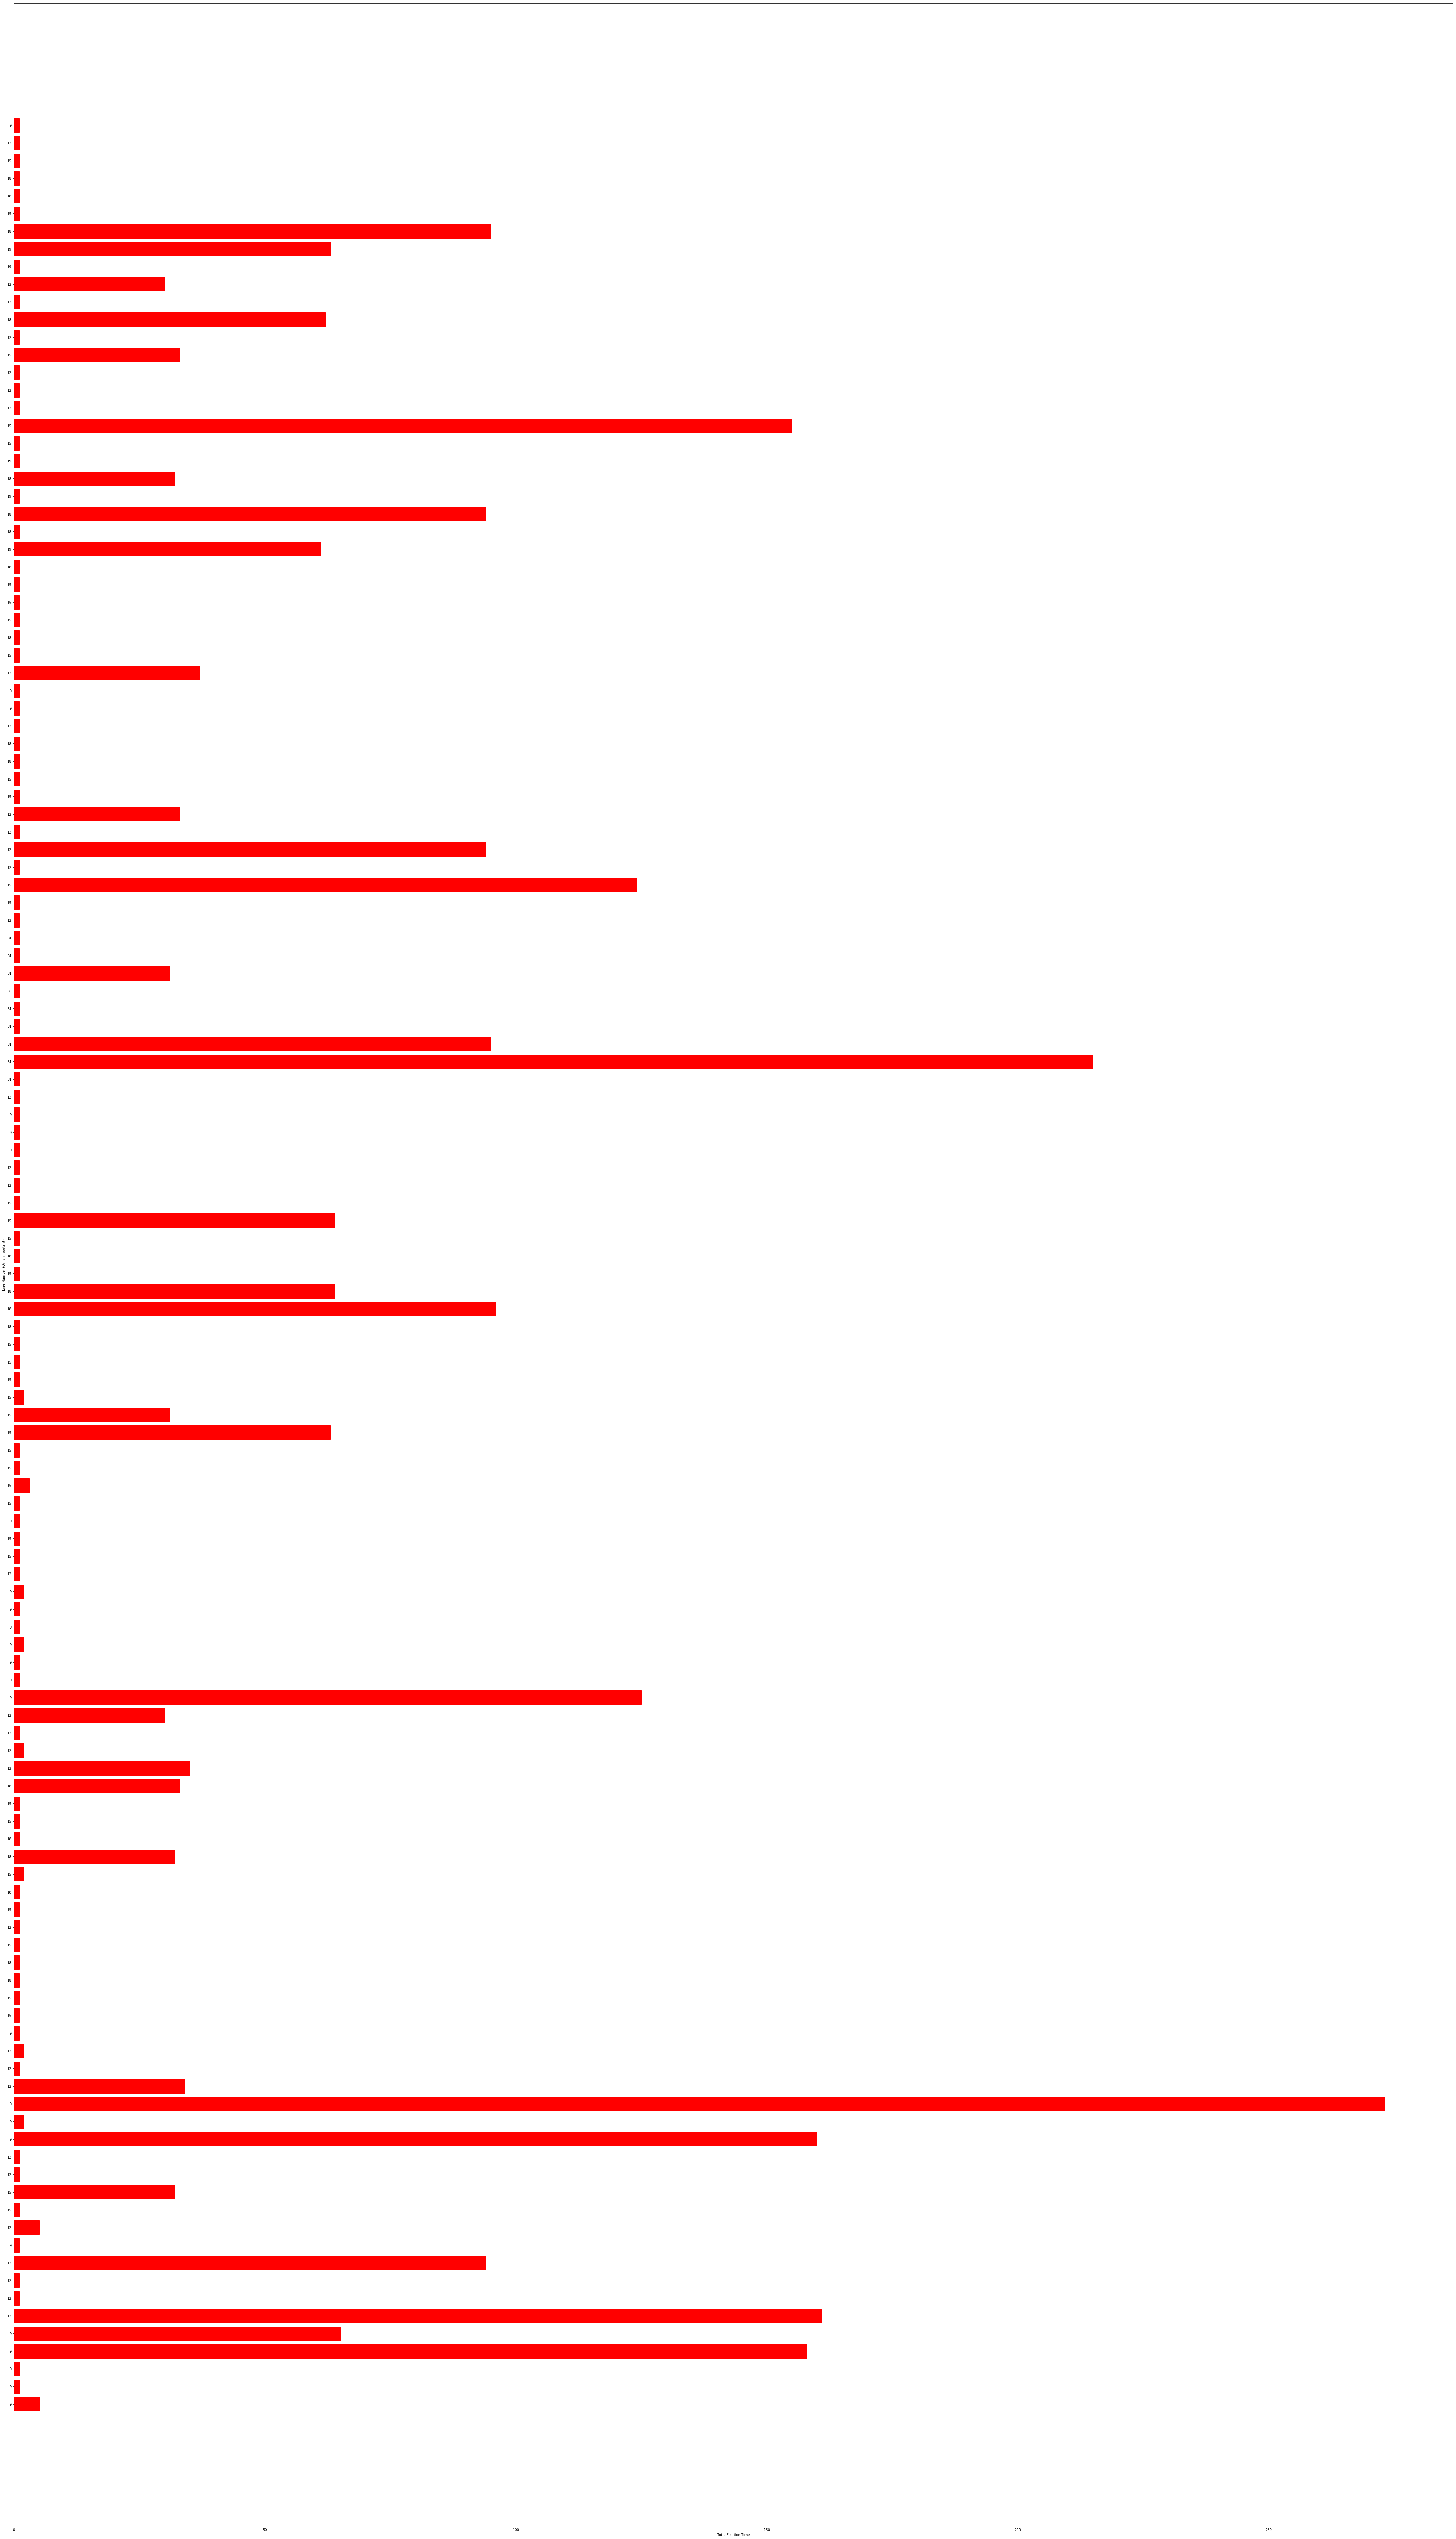

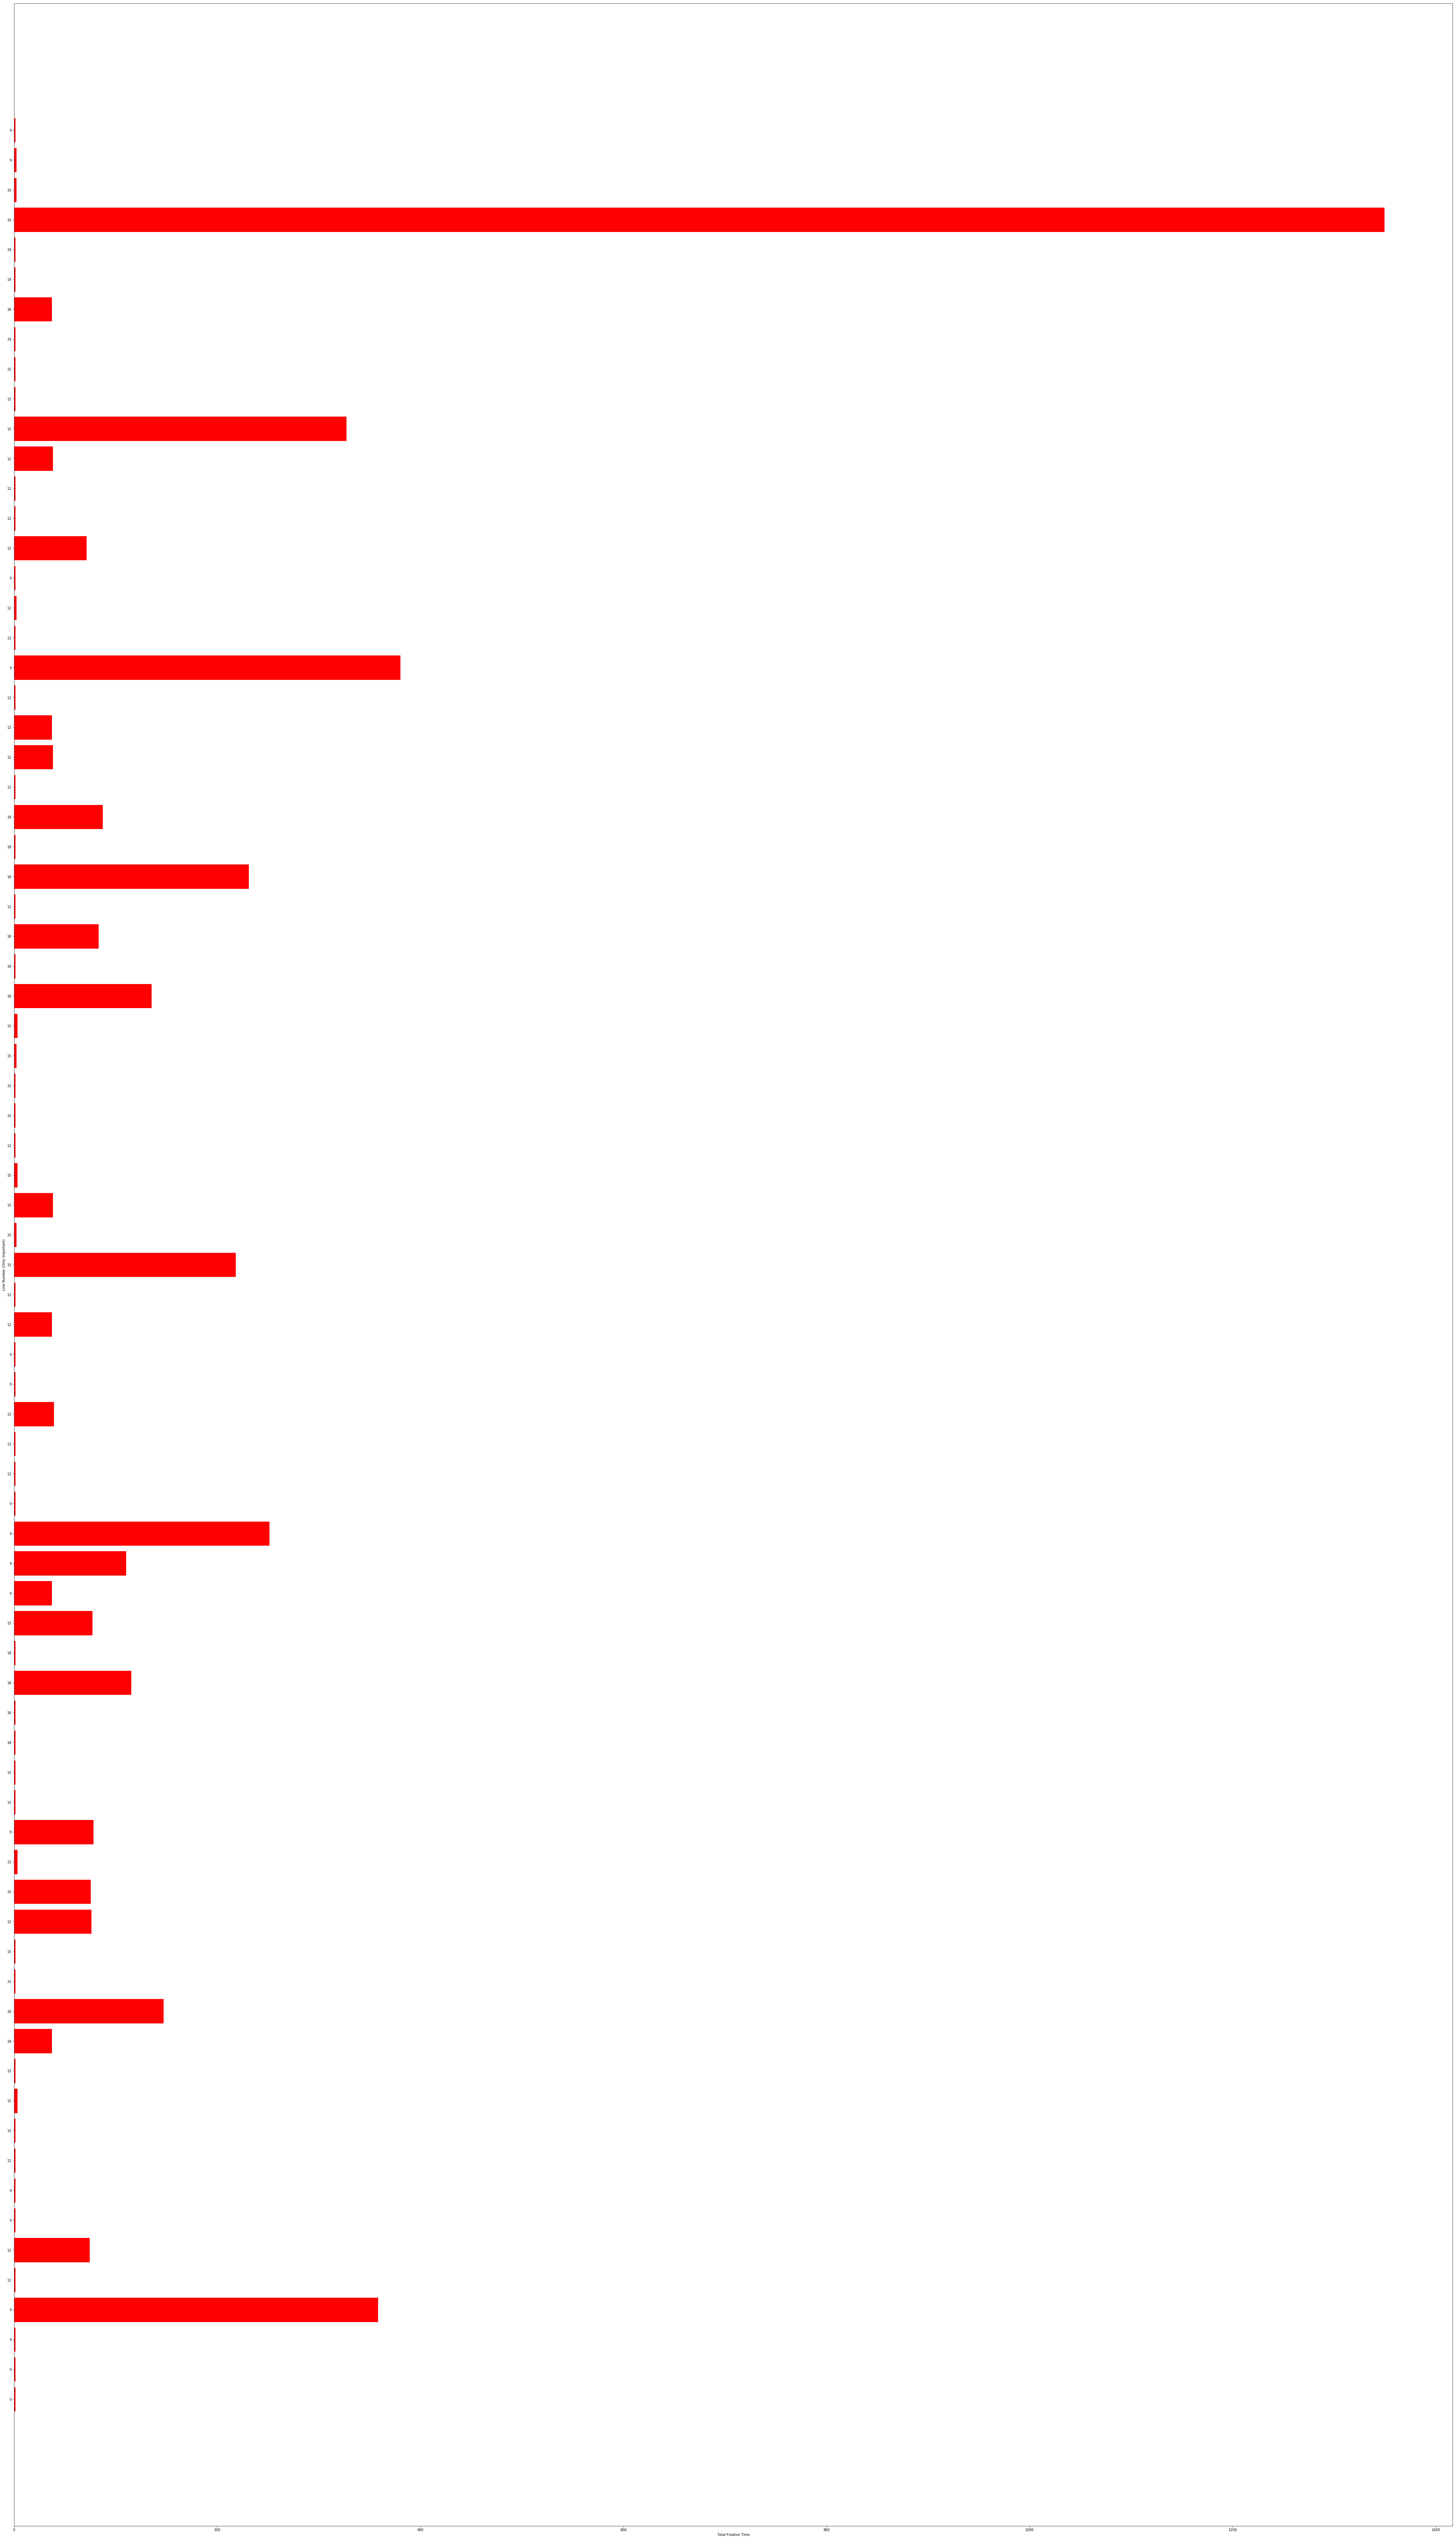

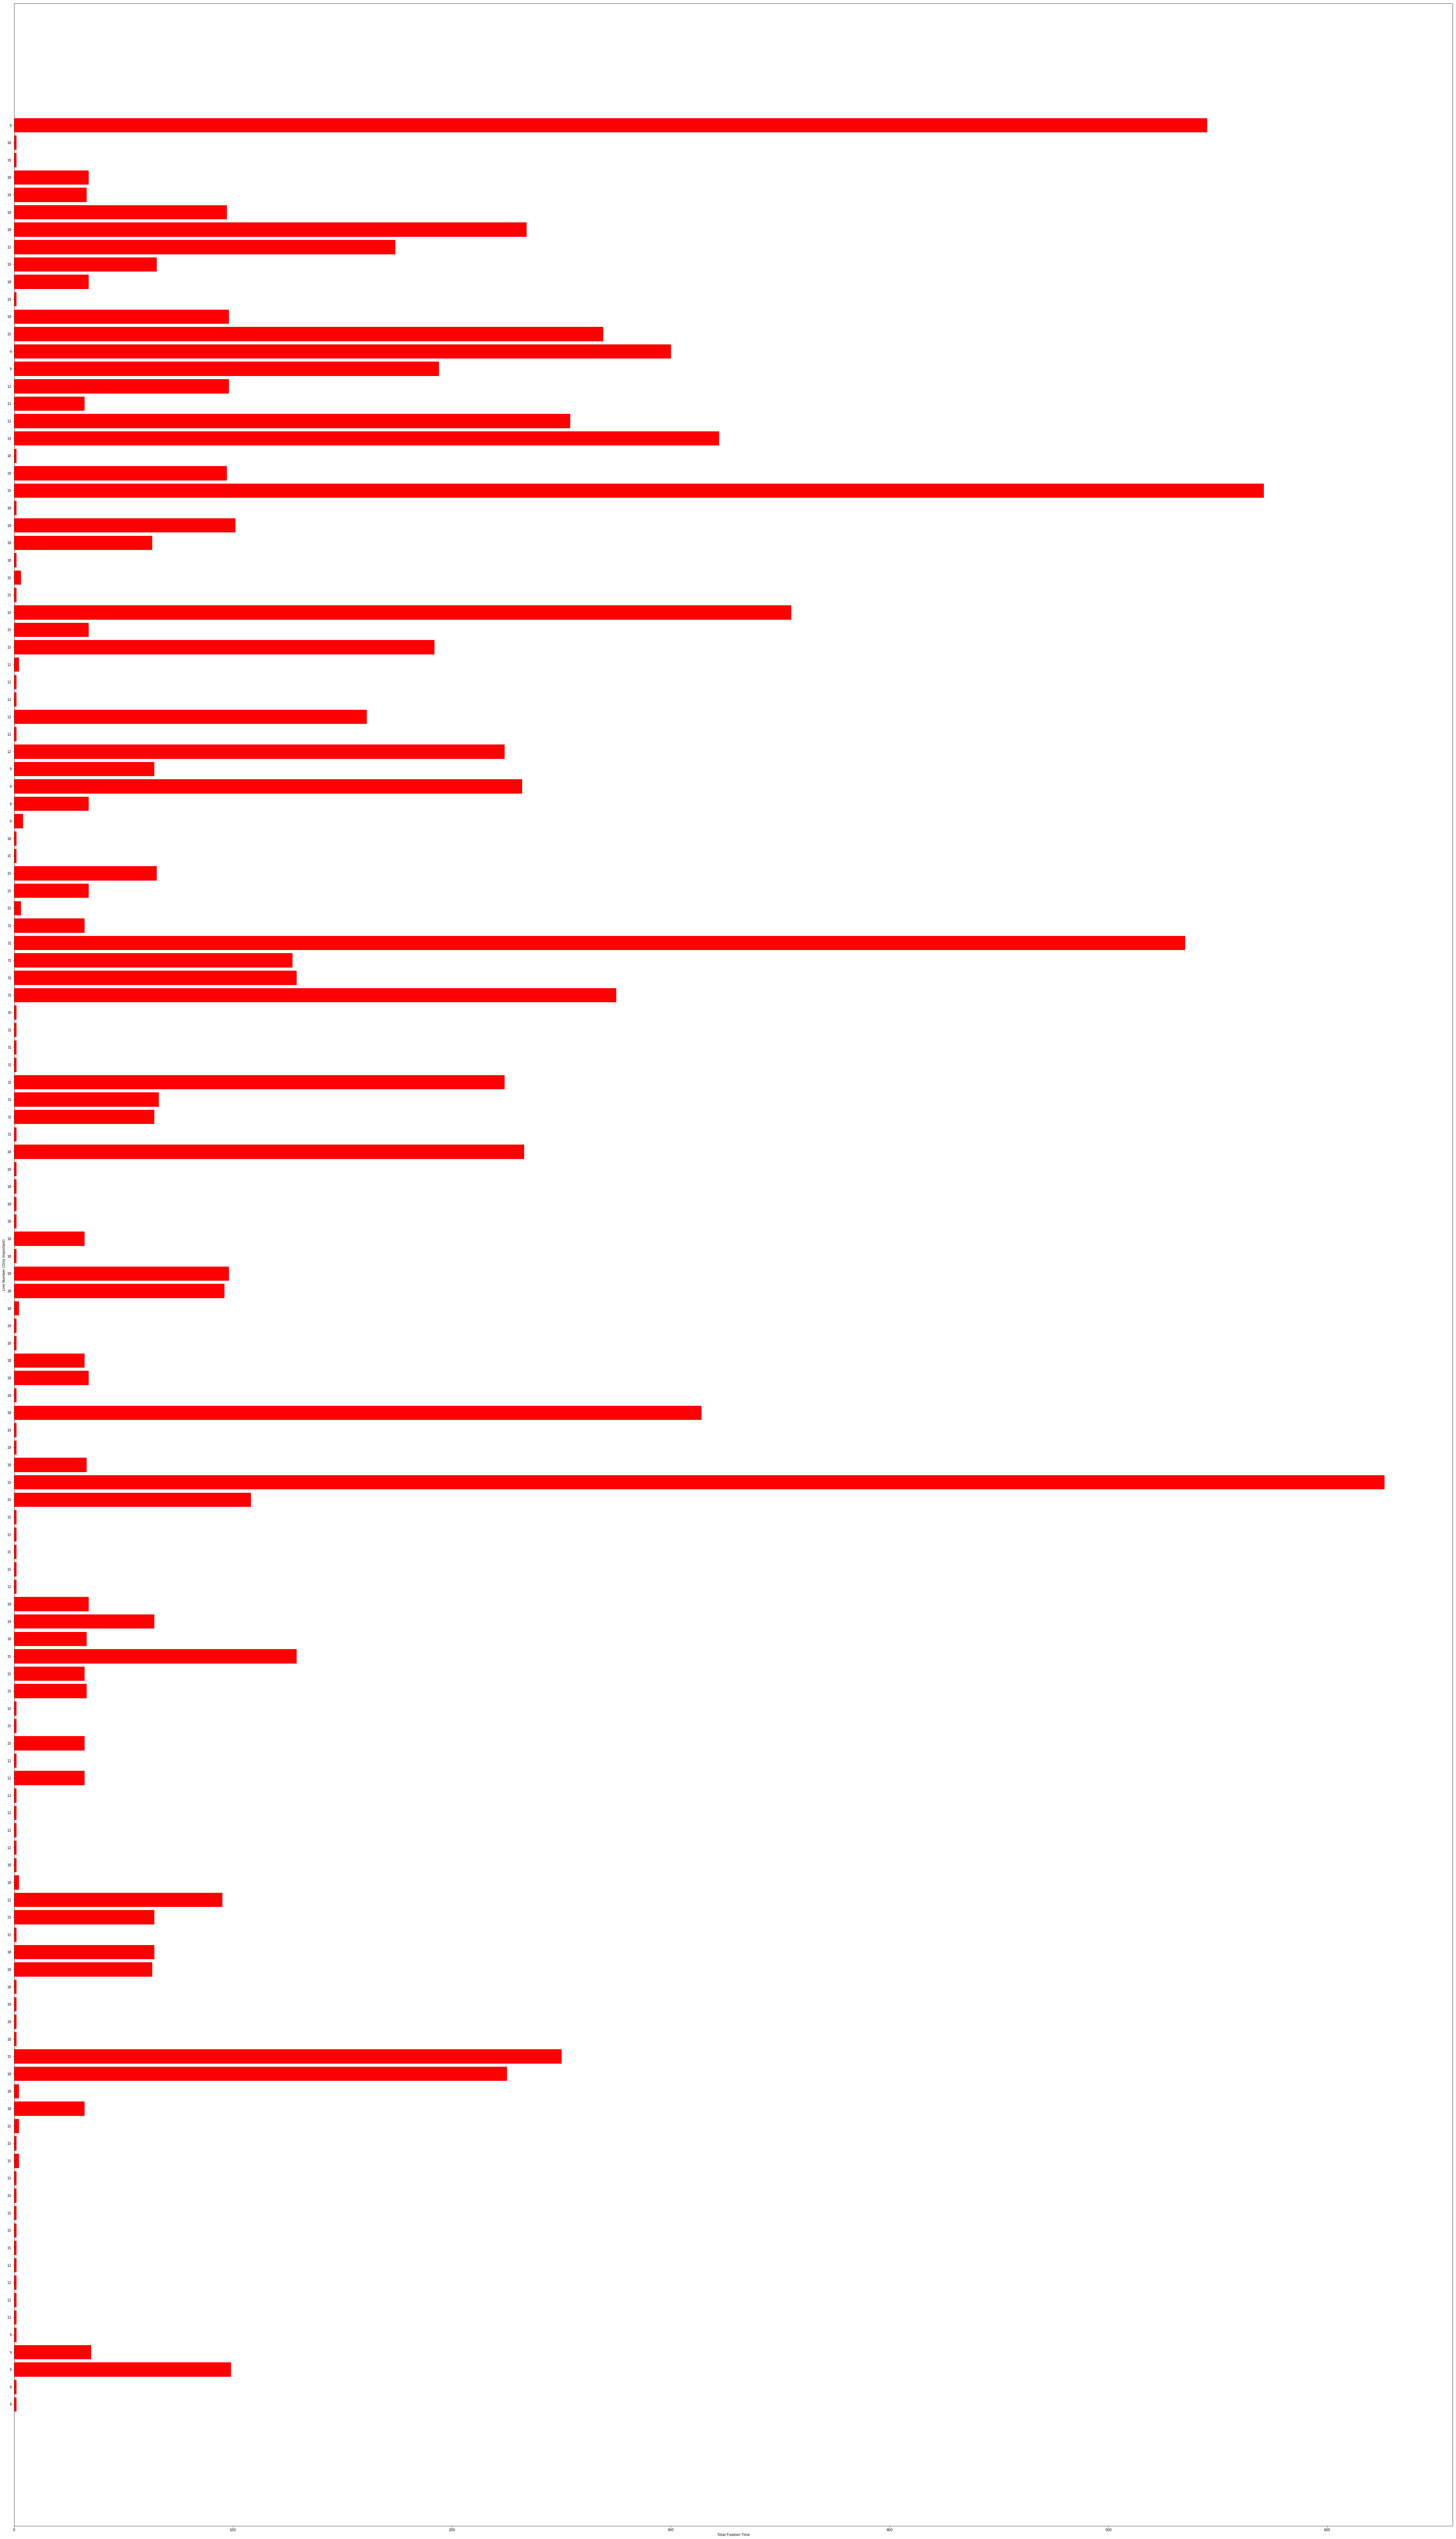

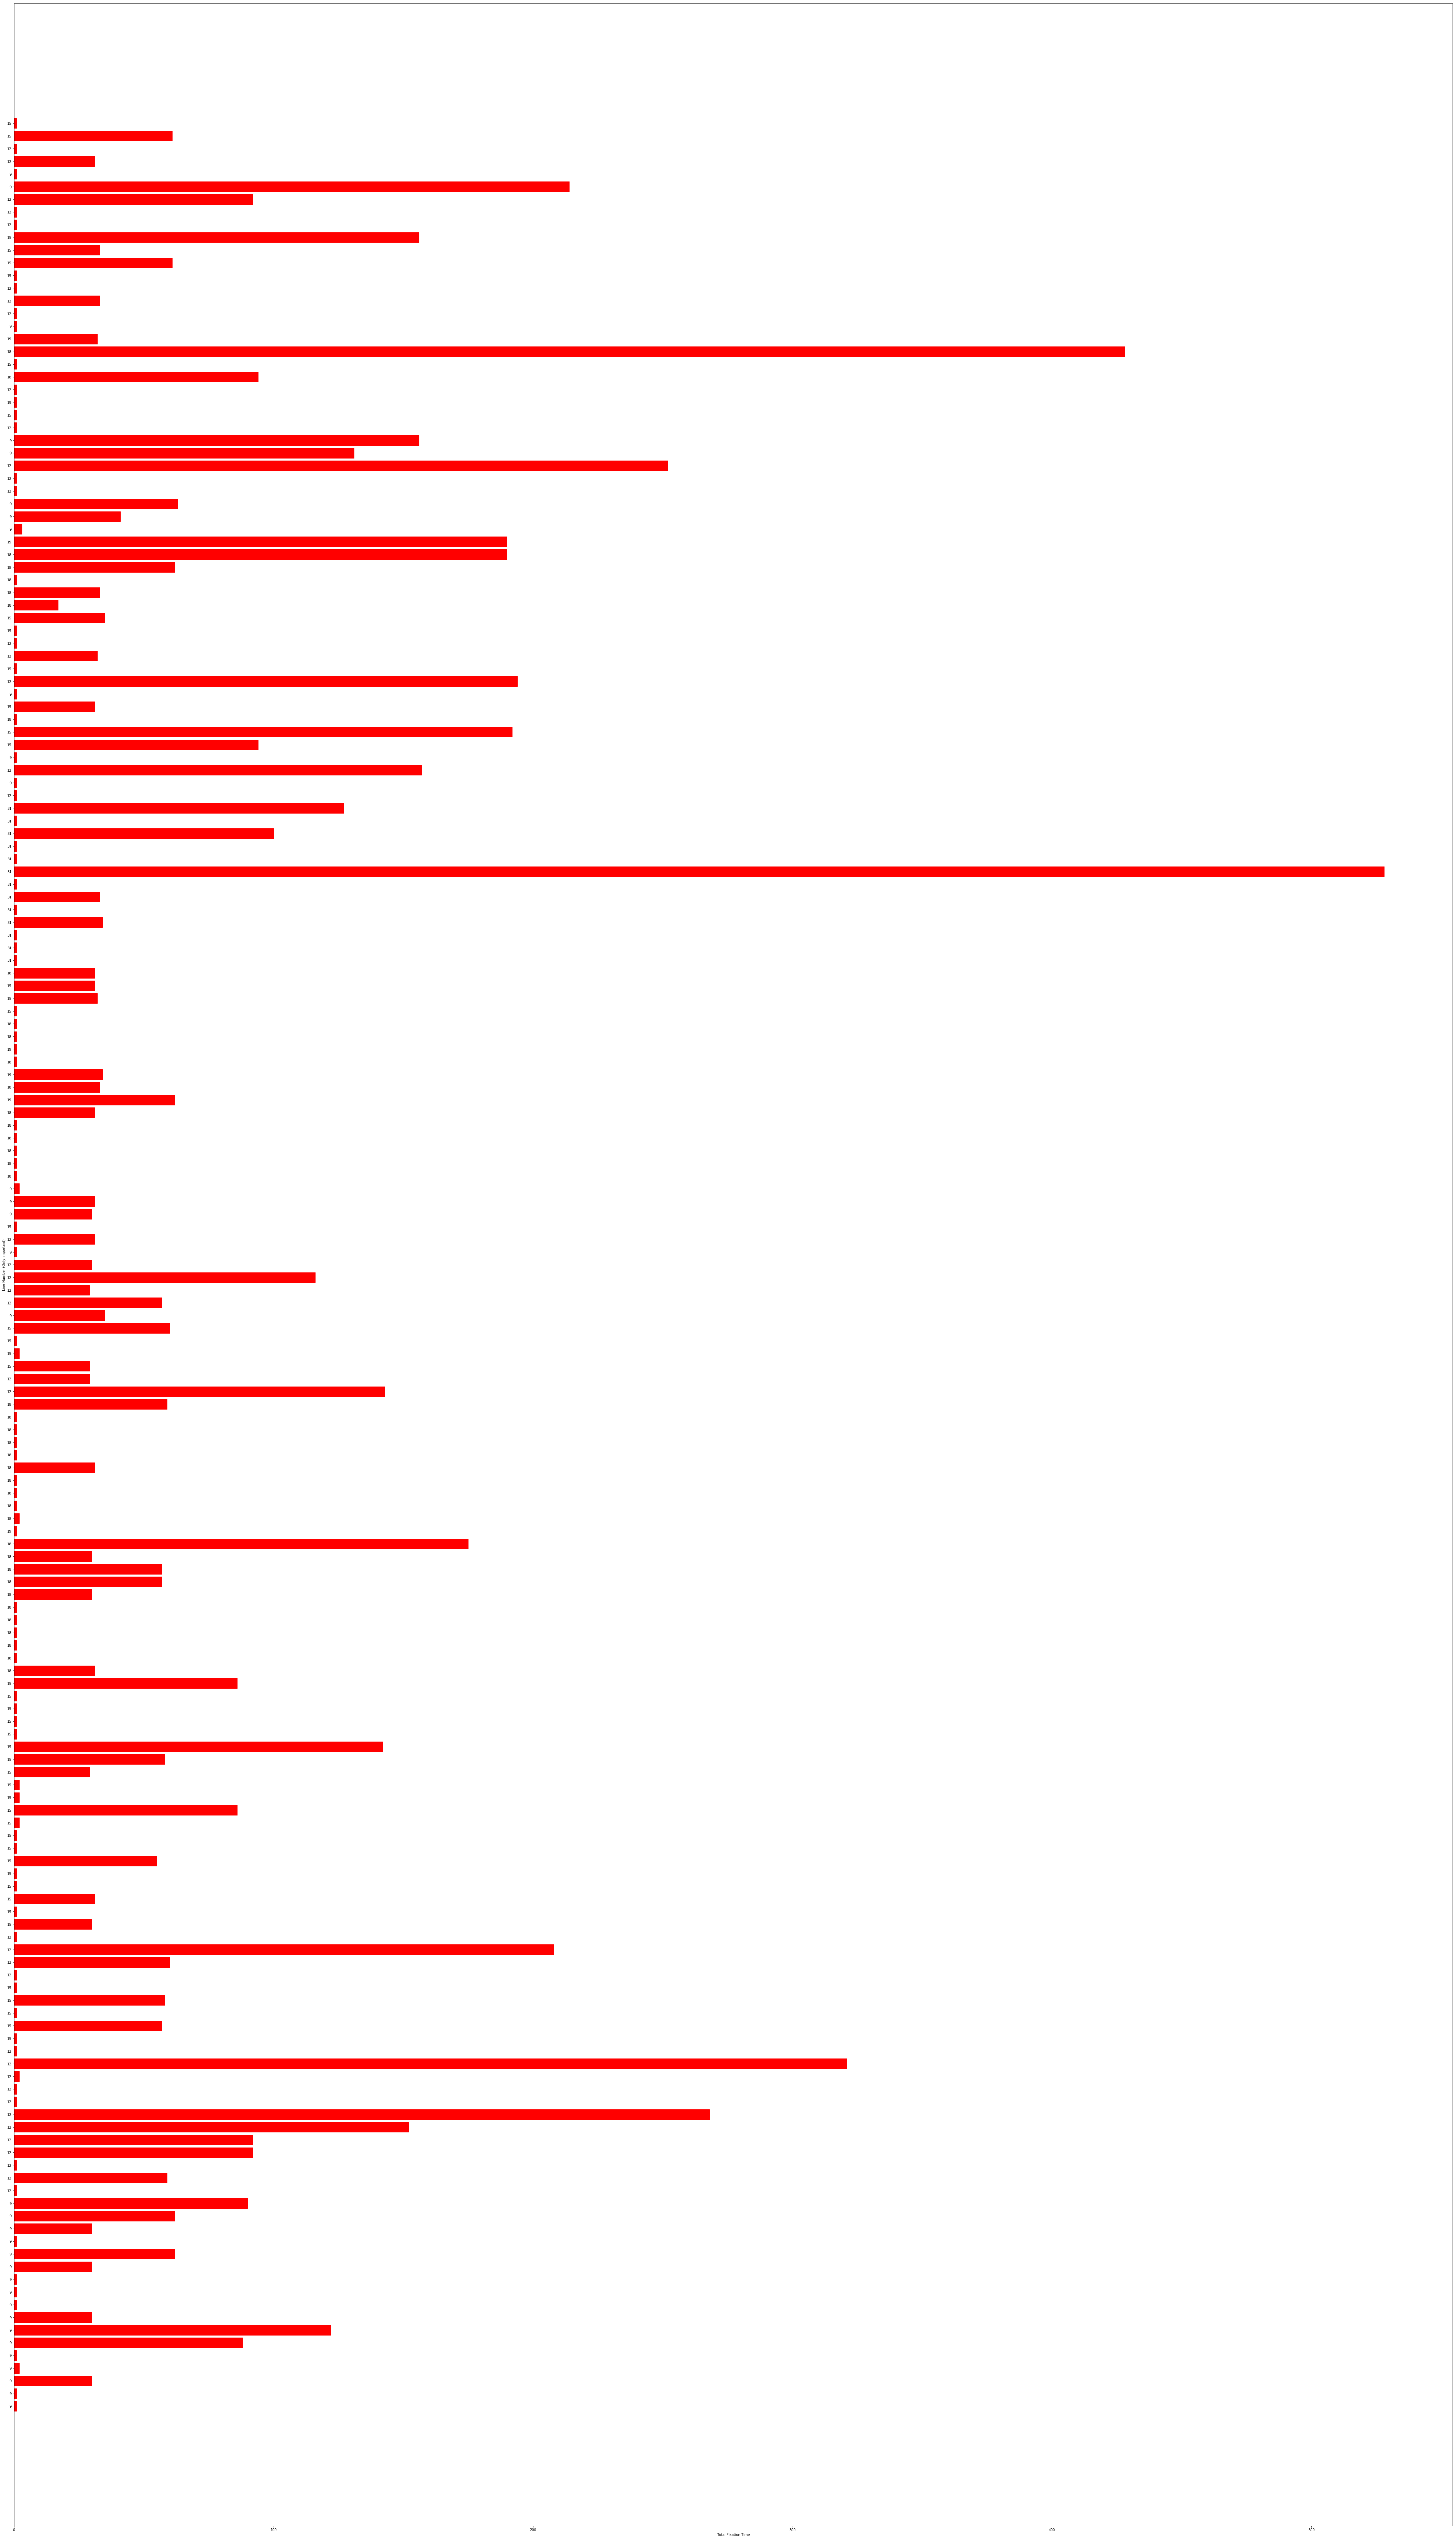

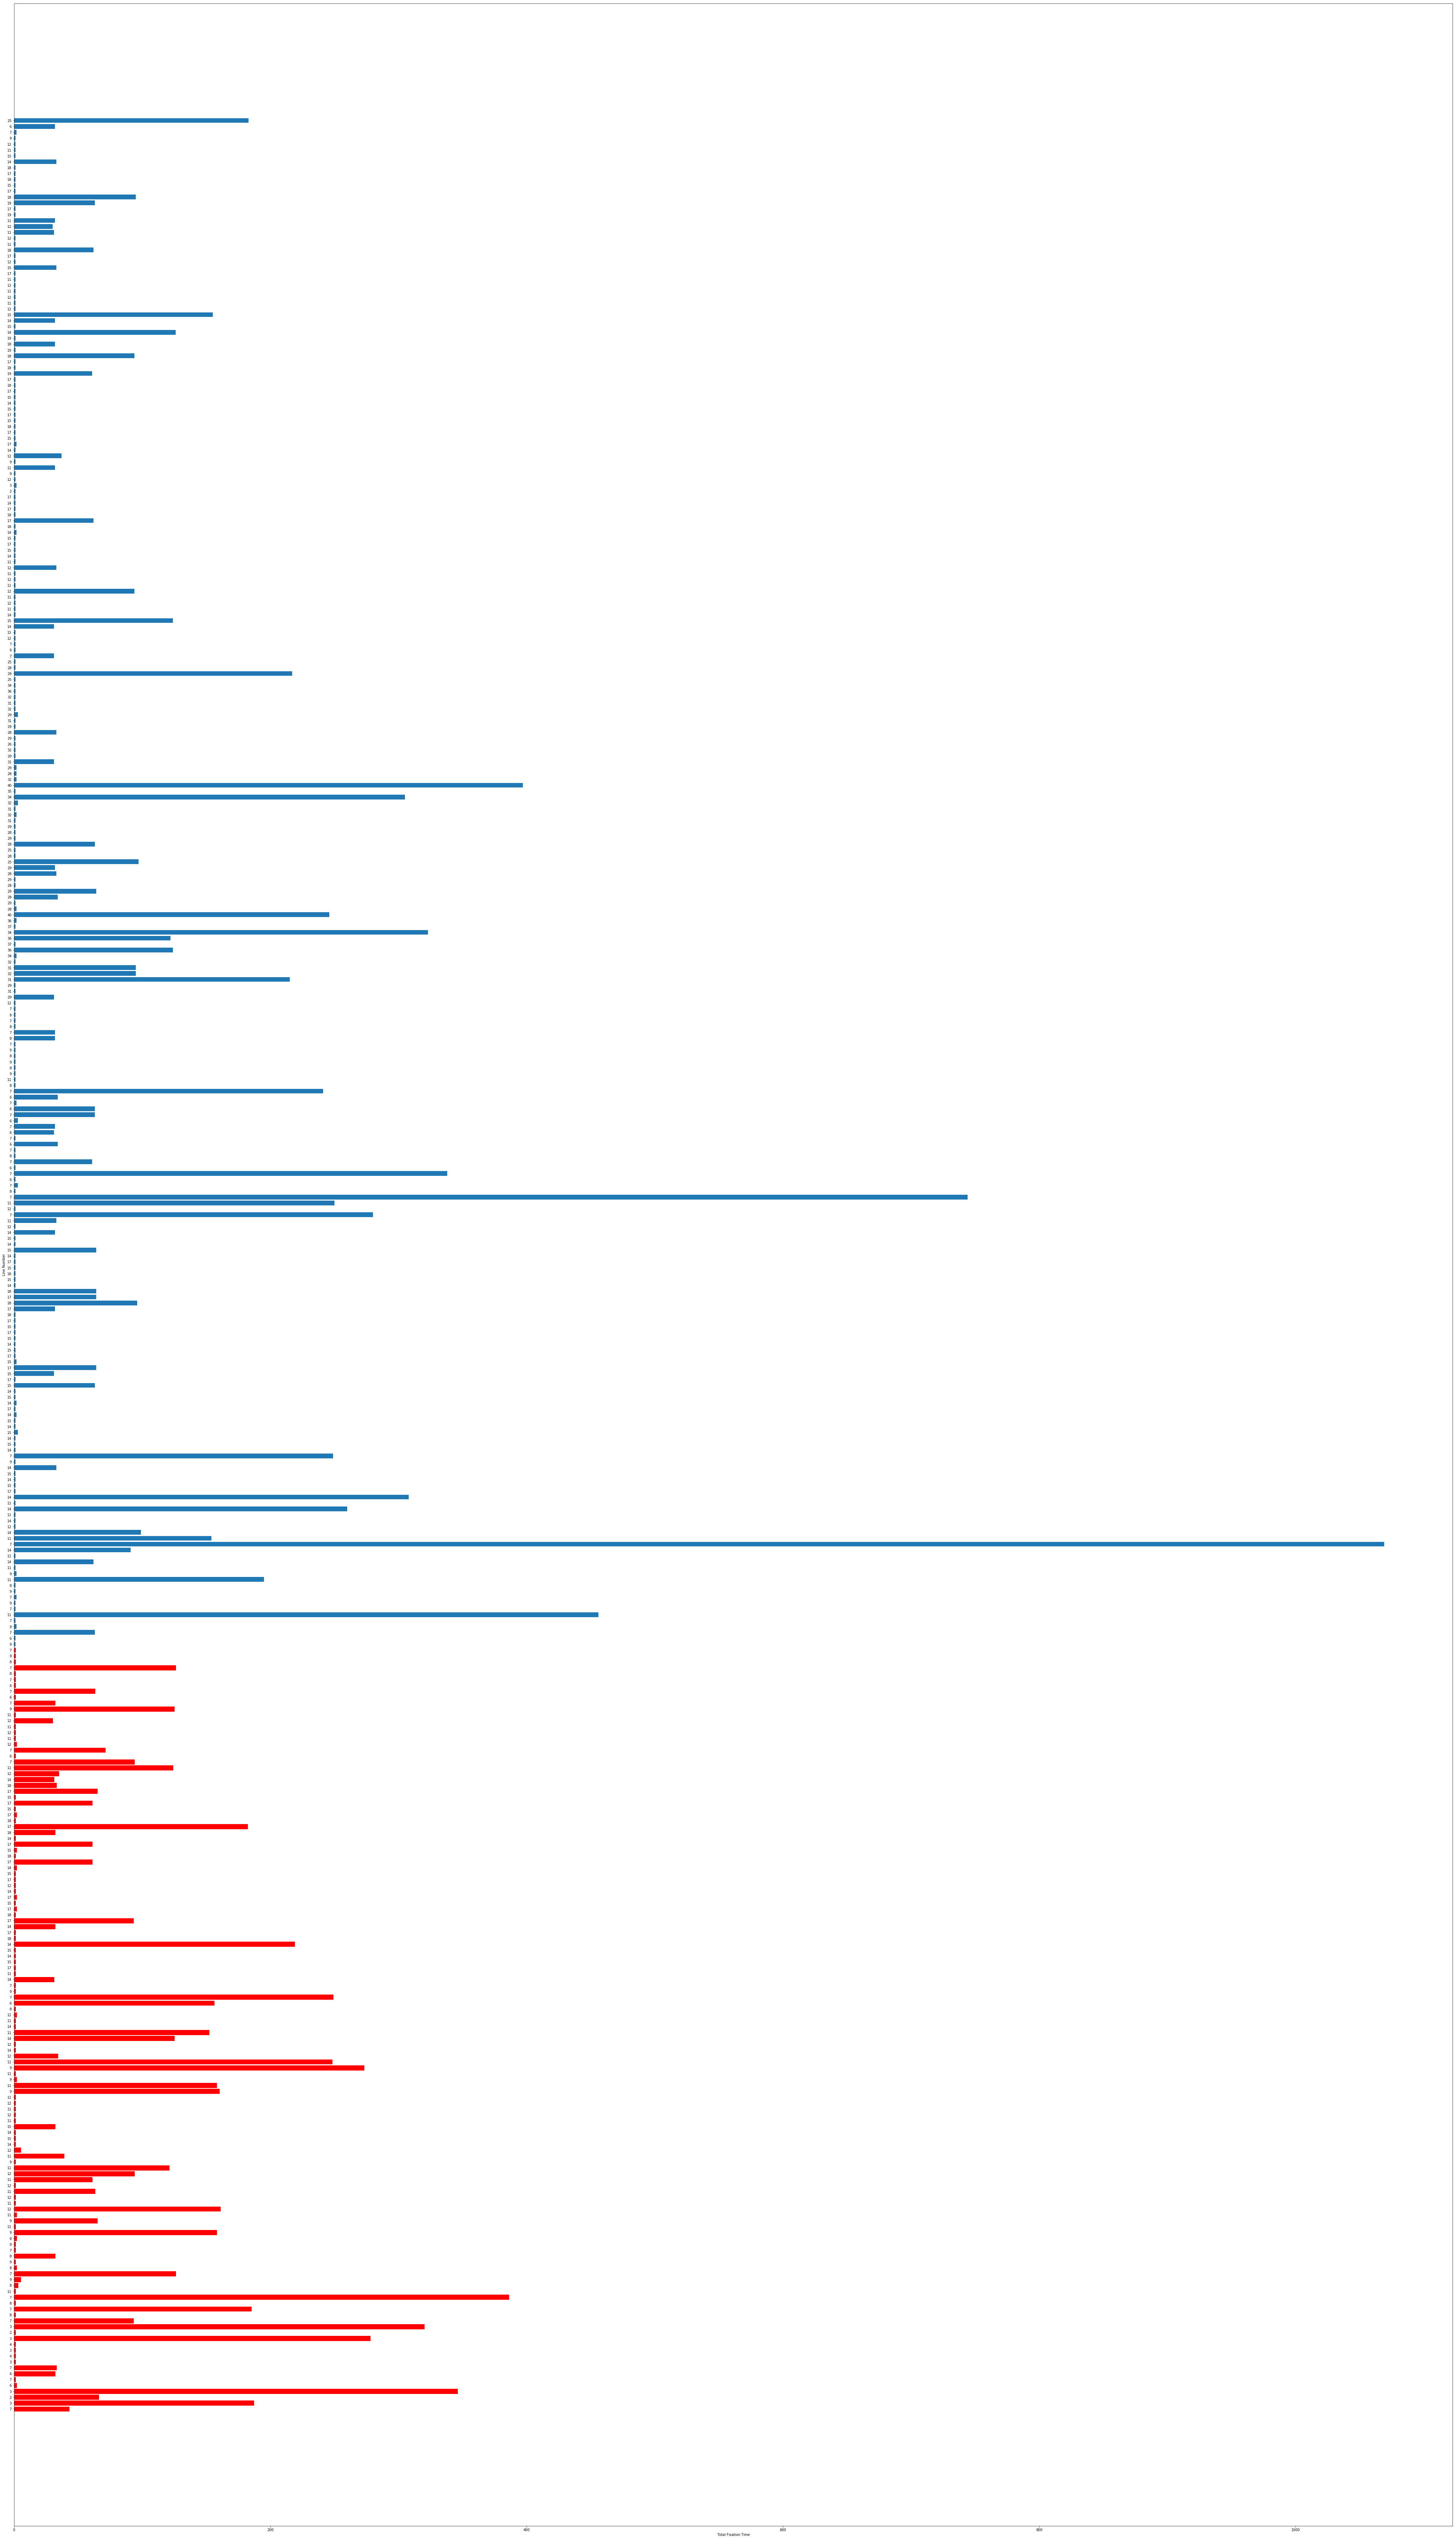

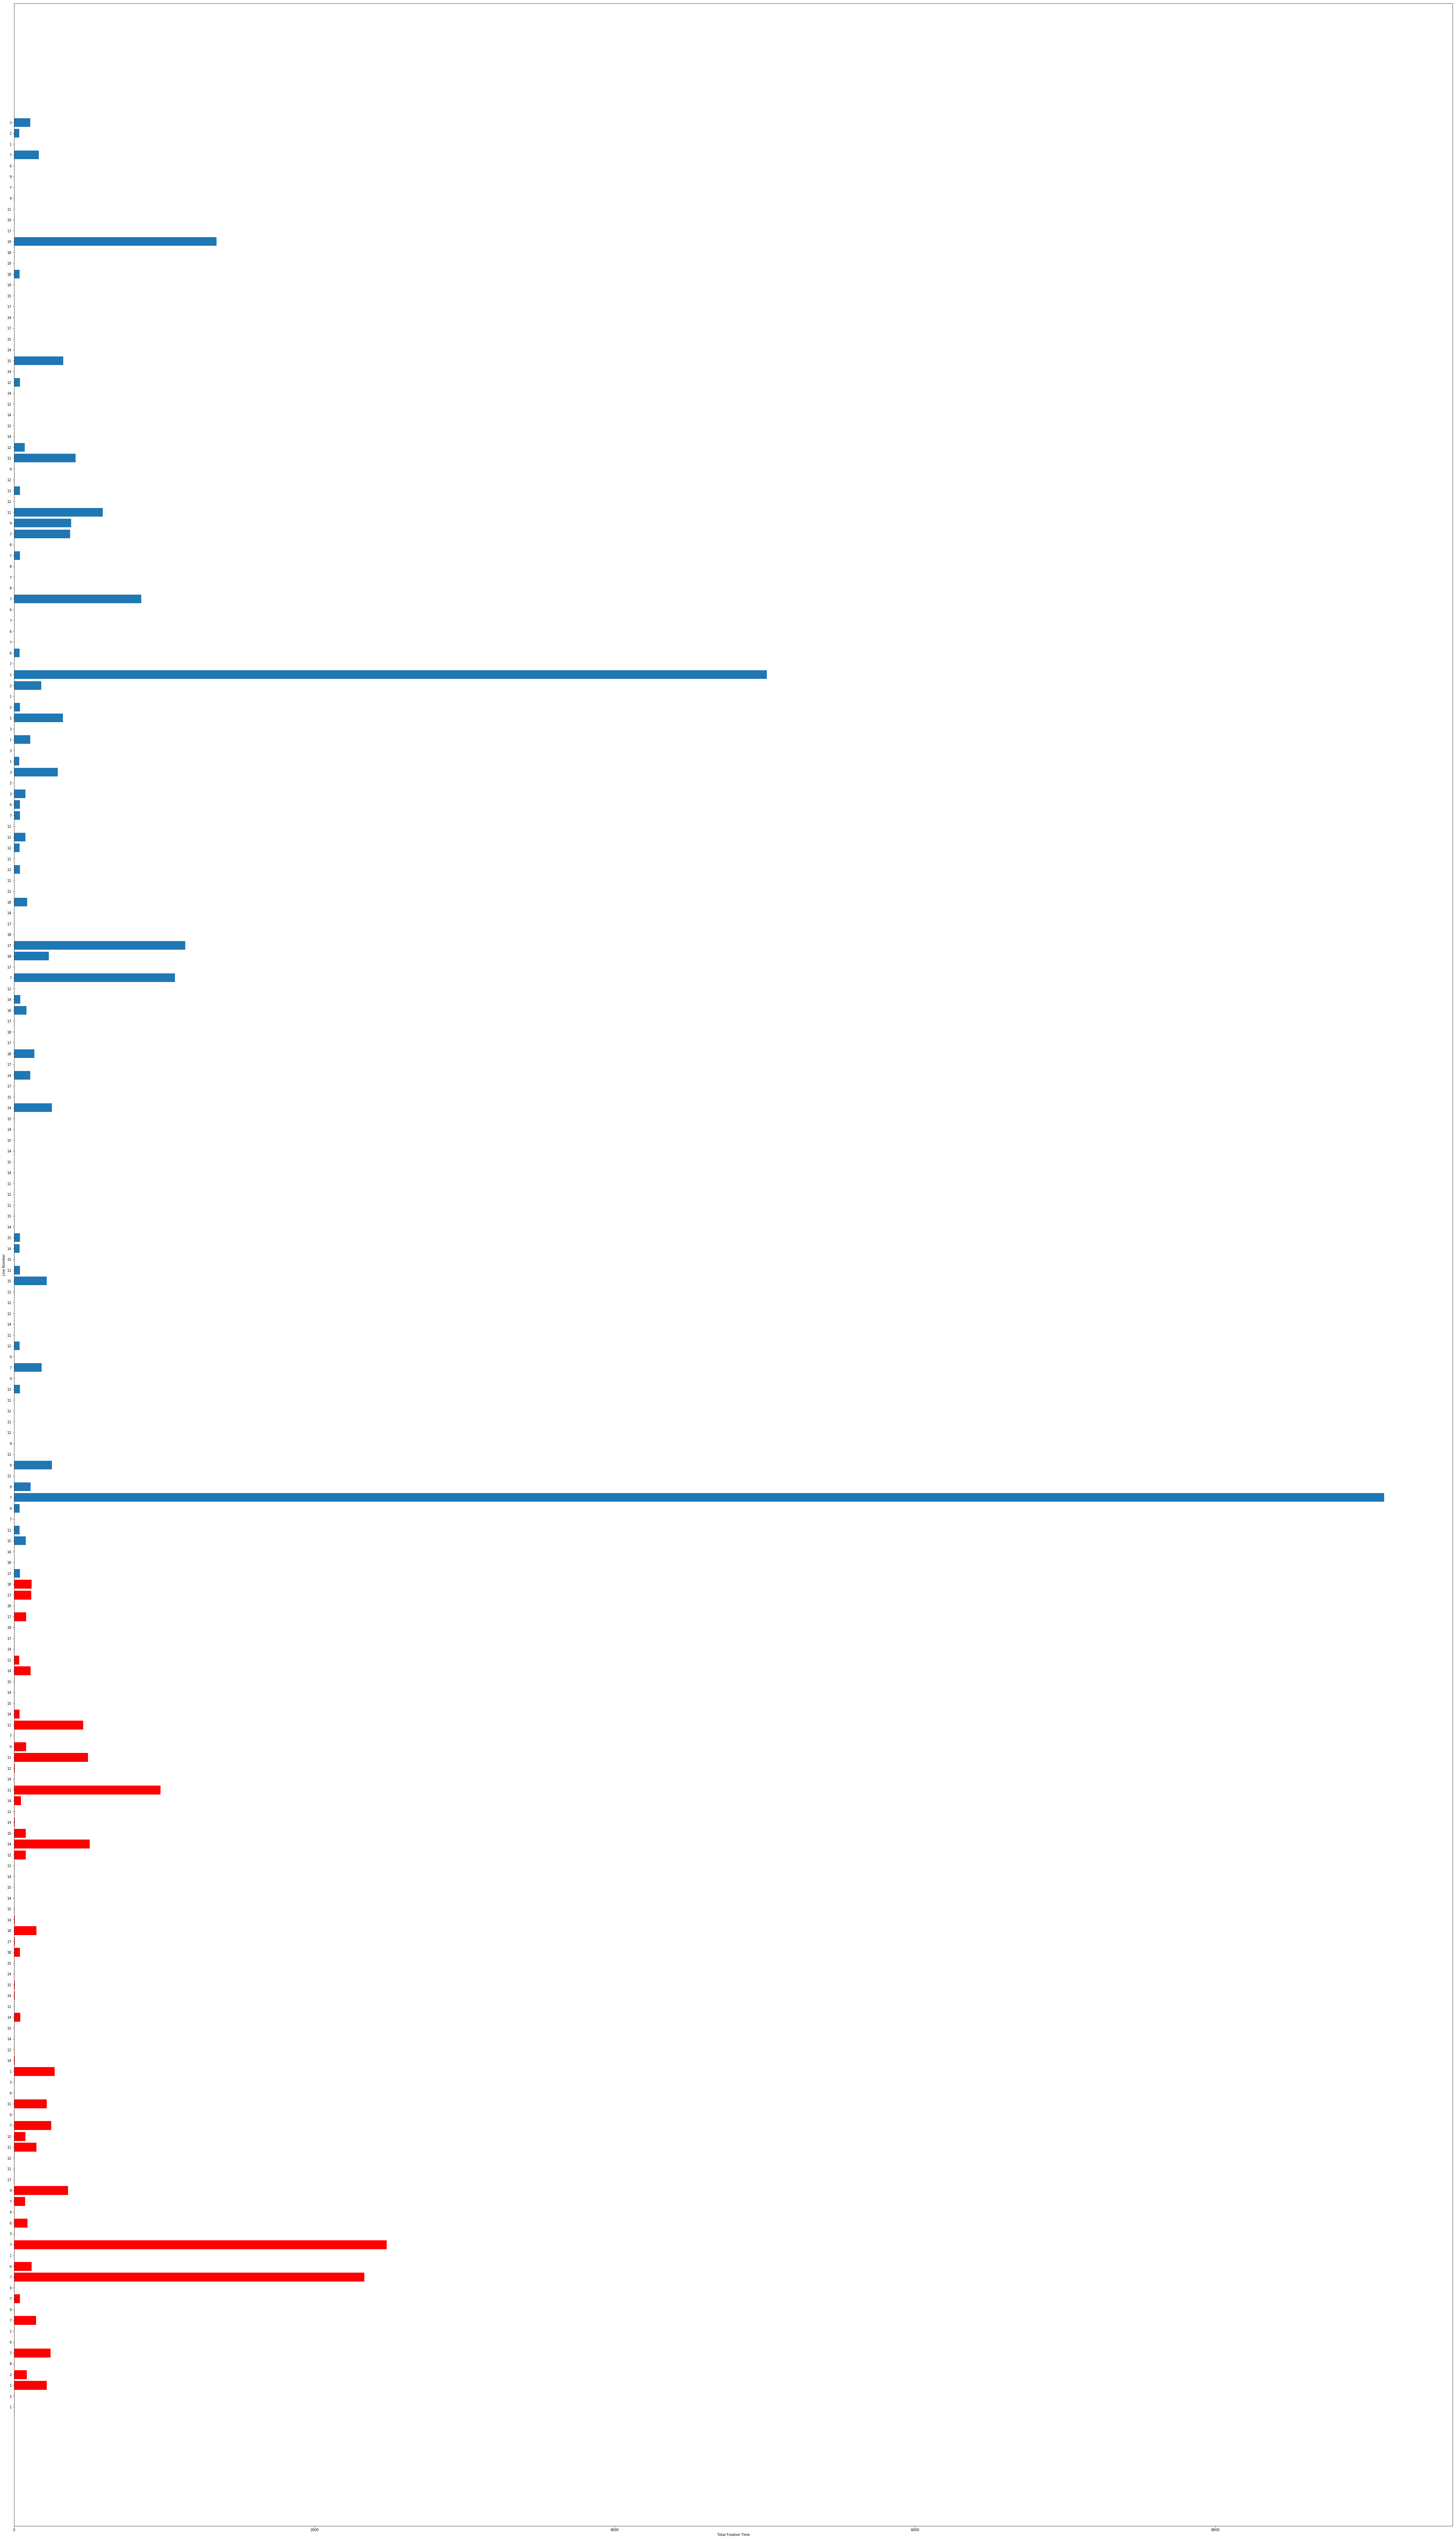

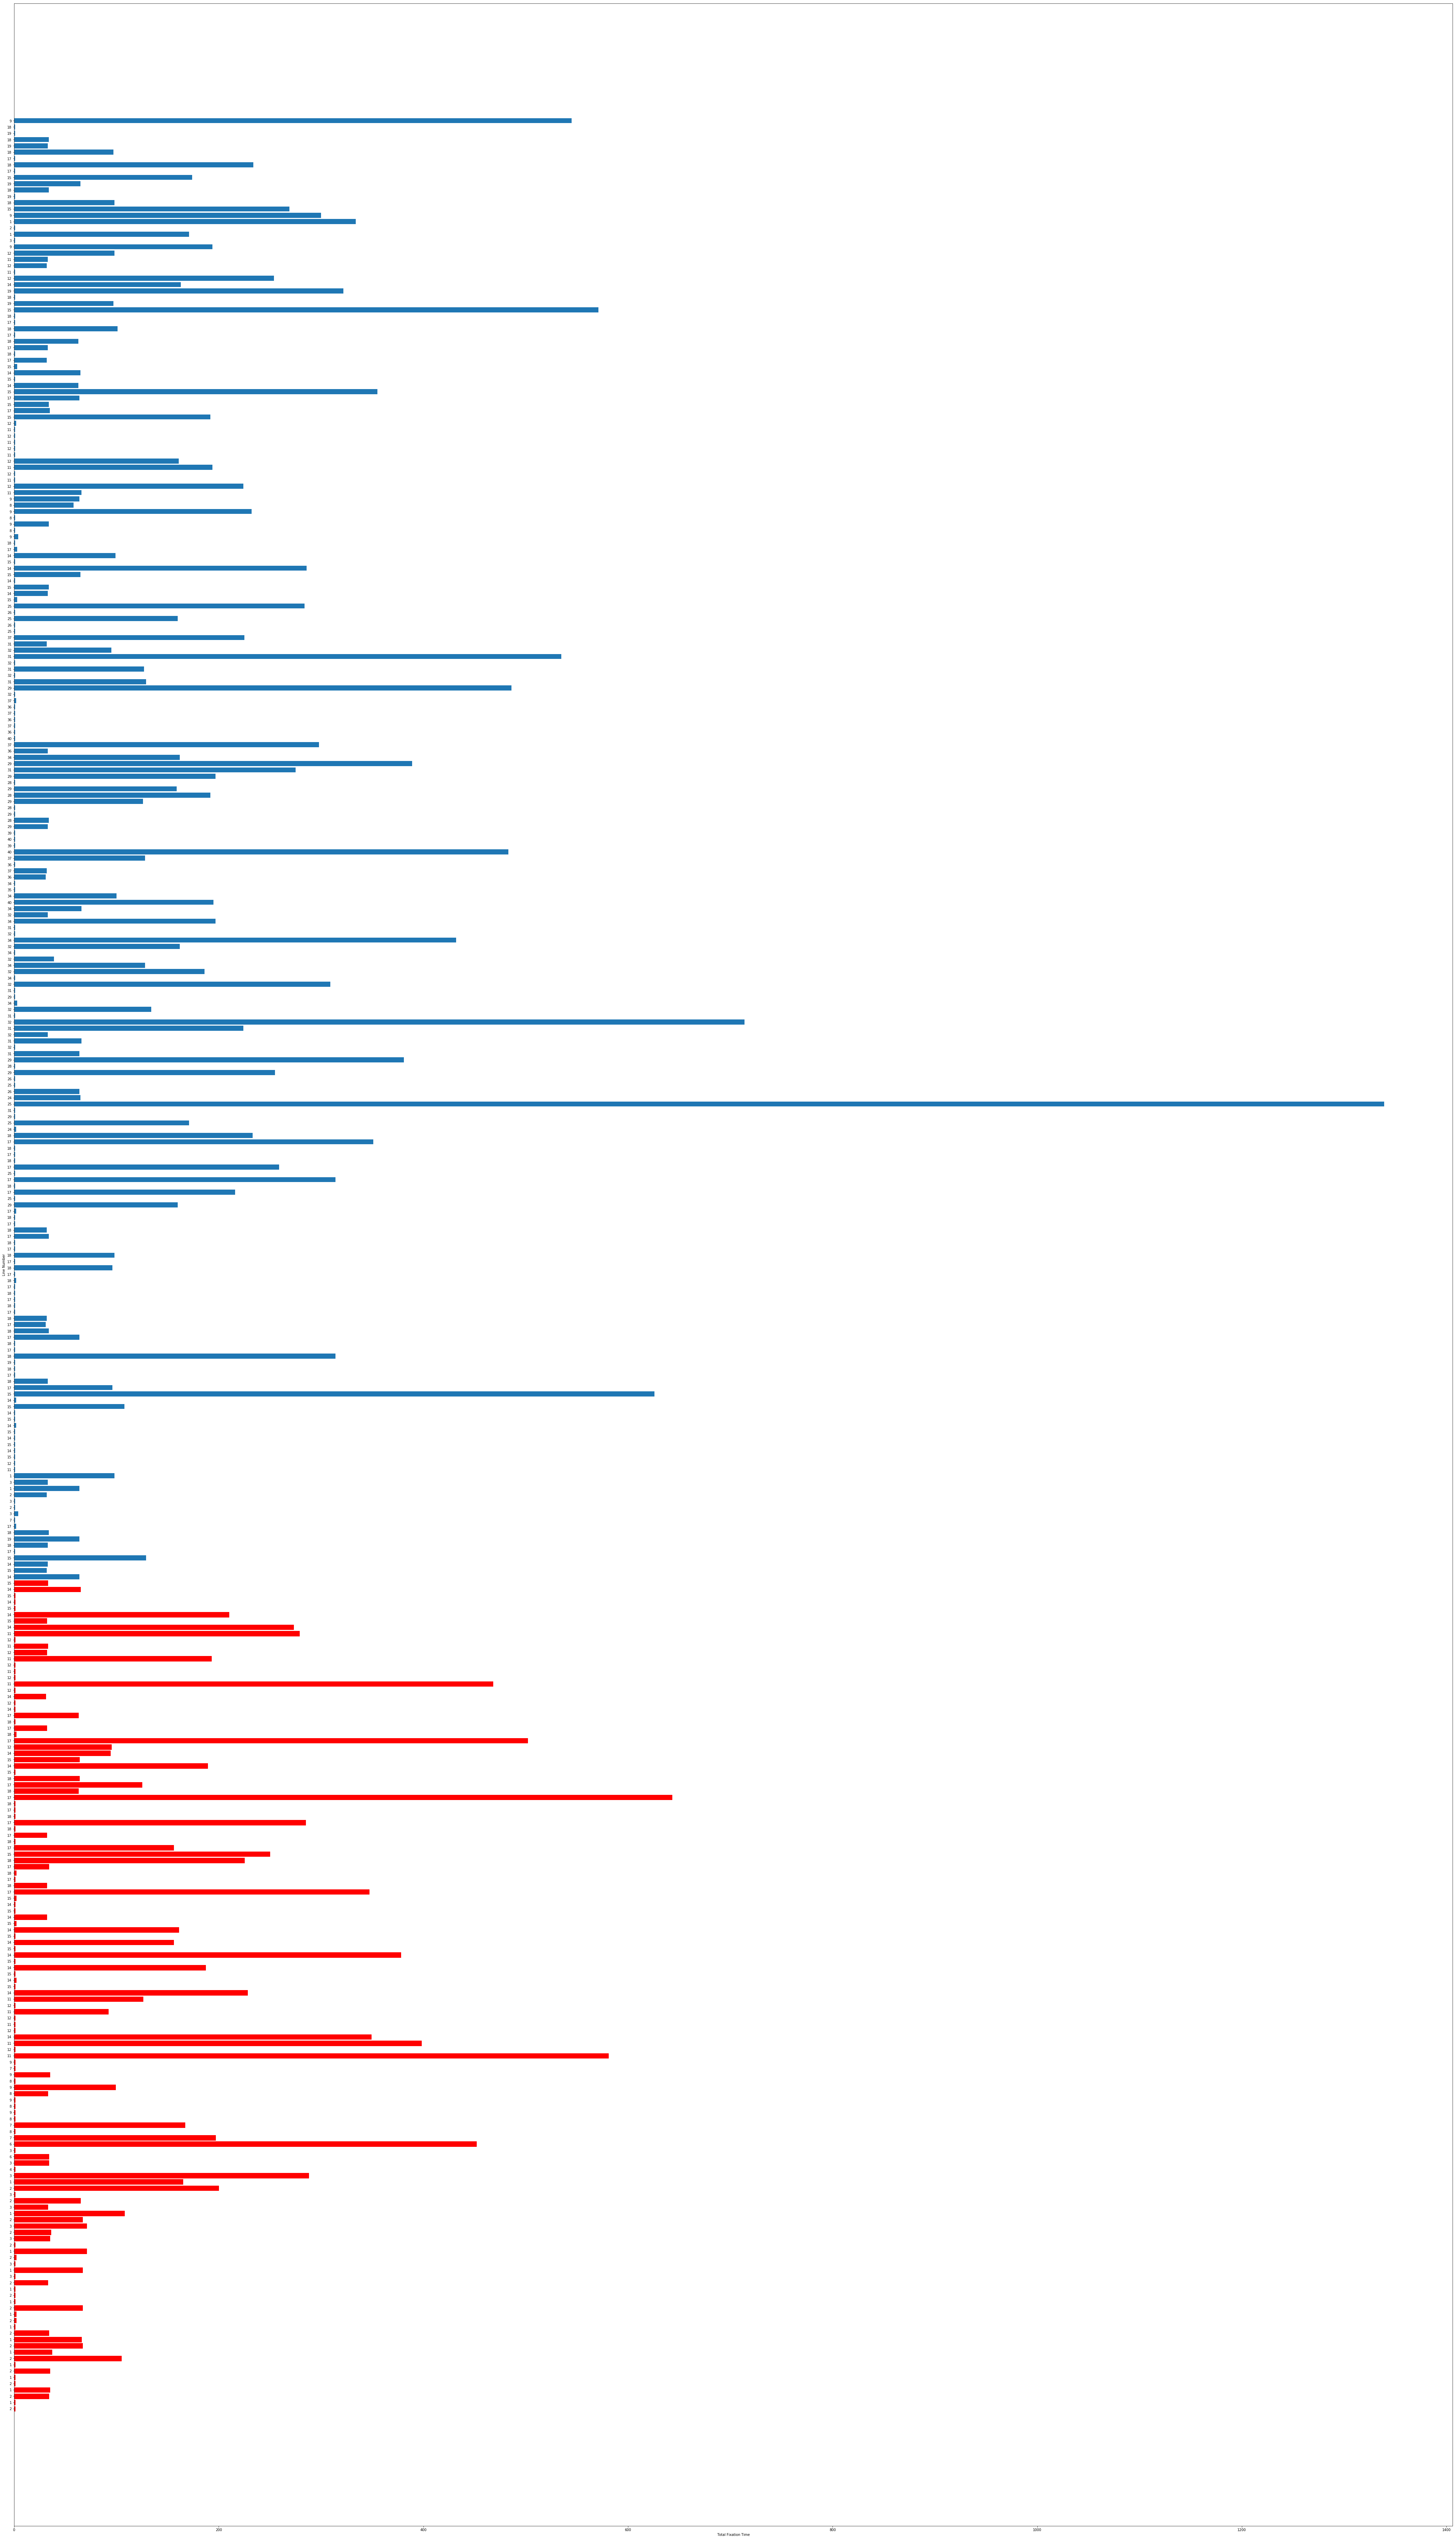

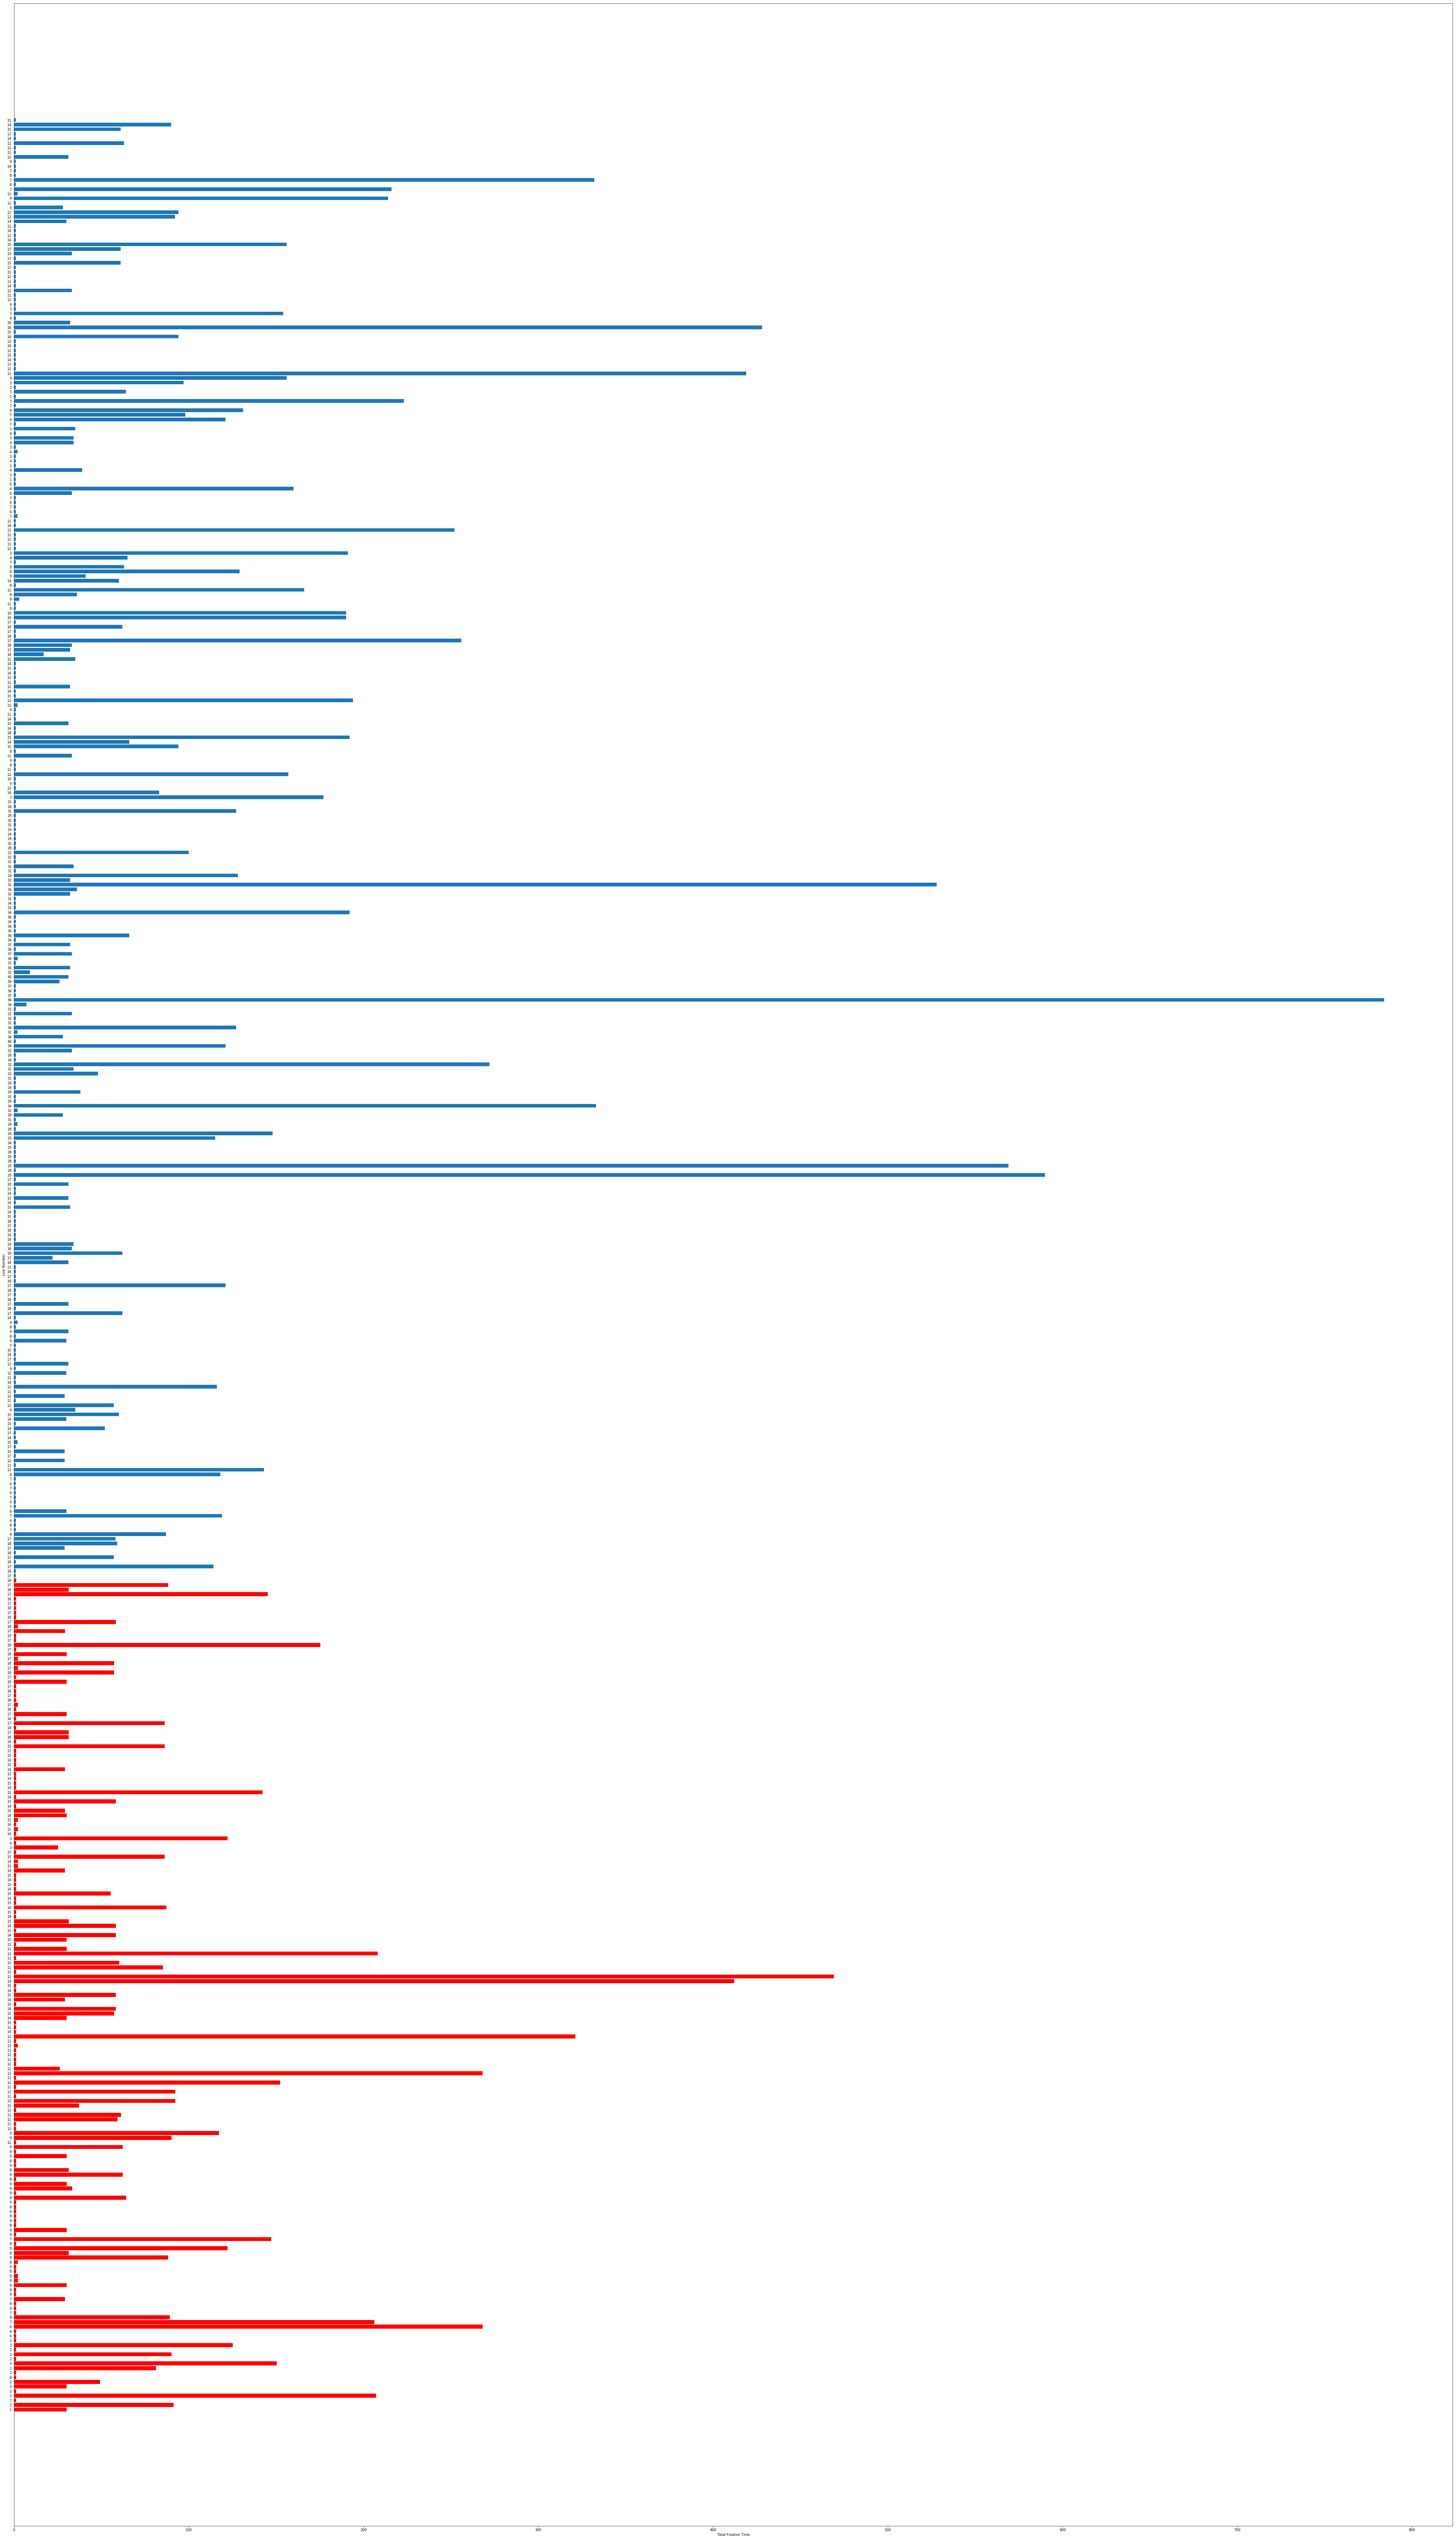

In [43]:
for sub in range(NUM_SUBJECTS):
    plt.figure(figsize=(75,135))
    xs = [x for x,y in prime_gaze_times[sub] if x in IMP_LINES_PRIME]
    ys = [y for x,y in prime_gaze_times[sub] if x in IMP_LINES_PRIME]
    rects = plt.barh(range(len(xs)),ys,tick_label=xs)
    plt.xlabel("Total Fixation Time")
    plt.ylabel("Line Number (Only Important)")
    i = 0
    for x,y in prime_gaze_times[sub]:
        if y == 0:
            continue
        if x in IMP_LINES_PRIME:
            rects[i].set_color('r')
        else:
            continue
        i+=1
    plt.savefig("./plots/gazetimes/prime/gaze_times_prime_imp{}.png".format(sub+1))
for sub in range(NUM_SUBJECTS):
    plt.figure(figsize=(75,135))
    xs = [x for x,y in prime_gaze_times[sub]]
    ys = [y for x,y in prime_gaze_times[sub]]
    plt.xlabel("Total Fixation Time")
    plt.ylabel("Line Number")
    rects = plt.barh(range(len(xs)),ys,tick_label=xs)
    i = 0
    for x,y in prime_gaze_times[sub]:
        if y == 0:
            continue
        if x in IMP_LINES_PRIME:
            rects[i].set_color('r')
        else:
            continue
        i+=1
    plt.savefig("./plots/gazetimes/prime/gaze_times_prime_all{}.png".format(sub+1))

In [51]:
TOTAL_GAZE_TIMES_ARMSTRONG = []
for sub in range(NUM_SUBJECTS):
    data = np.array(armstrong_data[sub])
    total = 0
    for line in data:
        if line[1] != 0:
            total += line[5] - line[4] + 1
    TOTAL_GAZE_TIMES_ARMSTRONG.append(total)

TOTAL_GAZE_TIMES_PRIME = []
for sub in range(NUM_SUBJECTS):
    data = np.array(prime_data[sub])
    total = 0
    for line in data:
        if line[1] != 0:
            total += line[5] - line[4] + 1
    TOTAL_GAZE_TIMES_PRIME.append(total)

TOTAL_GAZE_TIMES_ARMSTRONG, TOTAL_GAZE_TIMES_PRIME

([21986, 13221, 9830, 24897], [16298, 35208, 31090, 20598])

In [52]:
def gaze_time_imp(imp, data):
    data = np.array(data)
    total = 0
    for line in data:
        if line[1] == imp:
            total += line[5] - line[4] + 1
    return total

In [53]:
armstrong_gaze_imp = []
armstrong_gaze_imp_perc = []
for sub in range(NUM_SUBJECTS):
    temp = []
    temp_perc = []
    for imp in IMP_LINES_ARMSTRONG:
        gaze_time = gaze_time_imp(imp,armstrong_data[sub])
        temp.append(gaze_time)
        temp_perc.append(gaze_time/TOTAL_GAZE_TIMES_ARMSTRONG[sub])
    armstrong_gaze_imp.append(temp)
    armstrong_gaze_imp_perc.append(temp_perc)
        
armstrong_gaze_imp, armstrong_gaze_imp_perc    

([[771, 970, 1771, 938, 1376, 1430, 554, 621, 2315],
  [863, 254, 667, 7, 15, 481, 7, 1243, 18],
  [542, 314, 177, 391, 565, 1282, 107, 41, 4],
  [1945, 499, 1133, 2048, 1842, 913, 1271, 570, 462]],
 [[0.035067770399345034,
   0.04411898480851451,
   0.08055125989265896,
   0.042663513144728465,
   0.06258528154279996,
   0.06504138997543892,
   0.025197853179295914,
   0.02824524697534795,
   0.10529427817702174],
  [0.06527494138113607,
   0.01921185991982452,
   0.05045004160048408,
   0.0005294607064518569,
   0.0011345586566825505,
   0.03638151425762045,
   0.0005294607064518569,
   0.09401709401709402,
   0.0013614703880190605],
  [0.05513733468972533,
   0.031943031536113935,
   0.018006103763987792,
   0.039776195320447606,
   0.05747711088504578,
   0.1304170905391658,
   0.010885045778229909,
   0.004170905391658189,
   0.0004069175991861648],
  [0.07812186207173555,
   0.02004257541069205,
   0.045507490862352895,
   0.08225890669558582,
   0.07398481744788529,
   0.0366710

In [54]:
prime_gaze_imp = []
prime_gaze_imp_perc = []
for sub in range(NUM_SUBJECTS):
    temp = []
    temp_perc = []
    for imp in IMP_LINES_PRIME:
        gaze_time = gaze_time_imp(imp,prime_data[sub])
        temp.append(gaze_time)
        temp_perc.append(gaze_time/TOTAL_GAZE_TIMES_PRIME[sub])
    prime_gaze_imp.append(temp)
    prime_gaze_imp_perc.append(temp_perc)
        
prime_gaze_imp, prime_gaze_imp_perc    

([[807, 578, 537, 521, 127, 346, 0, 1],
  [1226, 427, 758, 878, 1353, 0, 0, 0],
  [1510, 911, 2993, 2009, 584, 1456, 0, 1],
  [1265, 2498, 1476, 1413, 321, 830, 0, 0]],
 [[0.0495152779482145,
   0.03546447416860964,
   0.032948828077064674,
   0.03196711252914468,
   0.007792367161614922,
   0.021229598723769786,
   0.0,
   6.135722174499939e-05],
  [0.03482163144739832,
   0.012127925471483754,
   0.02152919790956601,
   0.024937514201317883,
   0.03842876618950239,
   0.0,
   0.0,
   0.0],
  [0.04856867159858475,
   0.029302026375040206,
   0.096268896751367,
   0.06461884850434223,
   0.018784174975876488,
   0.046831778706979736,
   0.0,
   3.21646831778707e-05],
  [0.06141372948829984,
   0.1212739100883581,
   0.07165744247014273,
   0.06859889309641713,
   0.015584037285173317,
   0.040295174288765896,
   0.0,
   0.0]])

In [71]:

for sub in range(NUM_SUBJECTS):
    if sub == 1:
        plt.bar(np.arange(len(IMP_LINES_ARMSTRONG))+sub*0.16,np.array(armstrong_gaze_imp_perc[sub])*100,width=0.2,tick_label=IMP_LINES_ARMSTRONG)
    else:
        plt.bar(np.arange(len(IMP_LINES_ARMSTRONG))+sub*0.16,np.array(armstrong_gaze_imp_perc[sub])*100,width=0.2)
    plt.xlabel("Important Line Number")
    plt.ylabel("Percentage of Fixation Time(%)")
    plt.savefig("./plots/gazetimes/armstrong/percent_fixation_imp_arms.png")

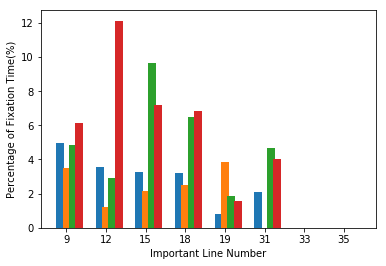

In [74]:
for sub in range(NUM_SUBJECTS):
    if sub == 1:
        plt.bar(np.arange(len(IMP_LINES_PRIME))+sub*0.16,np.array(prime_gaze_imp_perc[sub])*100,width=0.2,tick_label=IMP_LINES_PRIME)
    else:
        plt.bar(np.arange(len(IMP_LINES_PRIME))+sub*0.16,np.array(prime_gaze_imp_perc[sub])*100,width=0.2)
    plt.xlabel("Important Line Number")
    plt.ylabel("Percentage of Fixation Time(%)")
    plt.savefig("./plots/gazetimes/prime/percent_fixation_imp_prime.png")

In [83]:
armstrong_gaze_all = []
armstrong_gaze_all_perc = []
for sub in range(NUM_SUBJECTS):
    temp = []
    temp_perc = []
    for line in np.arange(LINES_ARMSTRONG):
        gaze_time = gaze_time_imp(line+1,armstrong_data[sub])
        temp.append(gaze_time)
        temp_perc.append(gaze_time/TOTAL_GAZE_TIMES_ARMSTRONG[sub])
    armstrong_gaze_all.append(temp)
    armstrong_gaze_all_perc.append(temp_perc)
        
armstrong_gaze_all, armstrong_gaze_all_perc   

([[129,
   7,
   1203,
   258,
   0,
   563,
   2401,
   316,
   244,
   150,
   771,
   970,
   1771,
   1310,
   256,
   938,
   1376,
   1430,
   554,
   3,
   436,
   882,
   5,
   994,
   143,
   1,
   1008,
   106,
   621,
   2315,
   825,
   0],
  [721,
   175,
   234,
   230,
   0,
   325,
   346,
   279,
   12,
   847,
   863,
   254,
   667,
   0,
   2,
   7,
   15,
   481,
   7,
   1,
   86,
   1710,
   7,
   2396,
   107,
   6,
   1123,
   914,
   1243,
   18,
   144,
   1],
  [727,
   535,
   300,
   1,
   0,
   76,
   161,
   762,
   34,
   831,
   542,
   314,
   177,
   0,
   5,
   391,
   565,
   1282,
   107,
   0,
   293,
   1470,
   0,
   865,
   1,
   0,
   210,
   13,
   41,
   4,
   123,
   0],
  [886,
   465,
   1115,
   7,
   0,
   1076,
   1851,
   2306,
   429,
   3703,
   1945,
   499,
   1133,
   0,
   342,
   2048,
   1842,
   913,
   1271,
   253,
   191,
   343,
   2,
   185,
   2,
   0,
   368,
   380,
   570,
   462,
   310,
   0]],
 [[0.00586737014463

In [84]:
prime_gaze_all = []
prime_gaze_all_perc = []
for sub in range(NUM_SUBJECTS):
    temp = []
    temp_perc = []
    for line in np.arange(LINES_PRIME):
        gaze_time = gaze_time_imp(line+1,prime_data[sub])
        temp.append(gaze_time)
        temp_perc.append(gaze_time/TOTAL_GAZE_TIMES_PRIME[sub])
    prime_gaze_all.append(temp)
    prime_gaze_all_perc.append(temp_perc)
        
prime_gaze_all, prime_gaze_all_perc 

([[0,
   68,
   1135,
   2,
   0,
   394,
   4726,
   84,
   807,
   0,
   2178,
   578,
   0,
   1575,
   537,
   0,
   776,
   521,
   127,
   0,
   0,
   0,
   0,
   0,
   283,
   1,
   0,
   171,
   357,
   0,
   346,
   106,
   0,
   631,
   1,
   249,
   2,
   0,
   0,
   643,
   0],
  [5970,
   339,
   479,
   0,
   0,
   281,
   17393,
   4,
   1226,
   0,
   3523,
   427,
   0,
   1195,
   758,
   0,
   1382,
   878,
   1353,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0],
  [1224,
   785,
   504,
   1,
   0,
   486,
   366,
   97,
   1510,
   0,
   2471,
   911,
   0,
   3172,
   2993,
   0,
   3772,
   2009,
   584,
   0,
   0,
   0,
   0,
   67,
   1958,
   67,
   0,
   229,
   2189,
   0,
   1456,
   1710,
   0,
   1091,
   1,
   68,
   687,
   0,
   2,
   680,
   0],
  [321,
   146,
   1190,
   425,
   0,
   486,
   1494,
   643,
   1265,
   1,
   1513,
   2498,
   0,
   1266,
   1476,
  

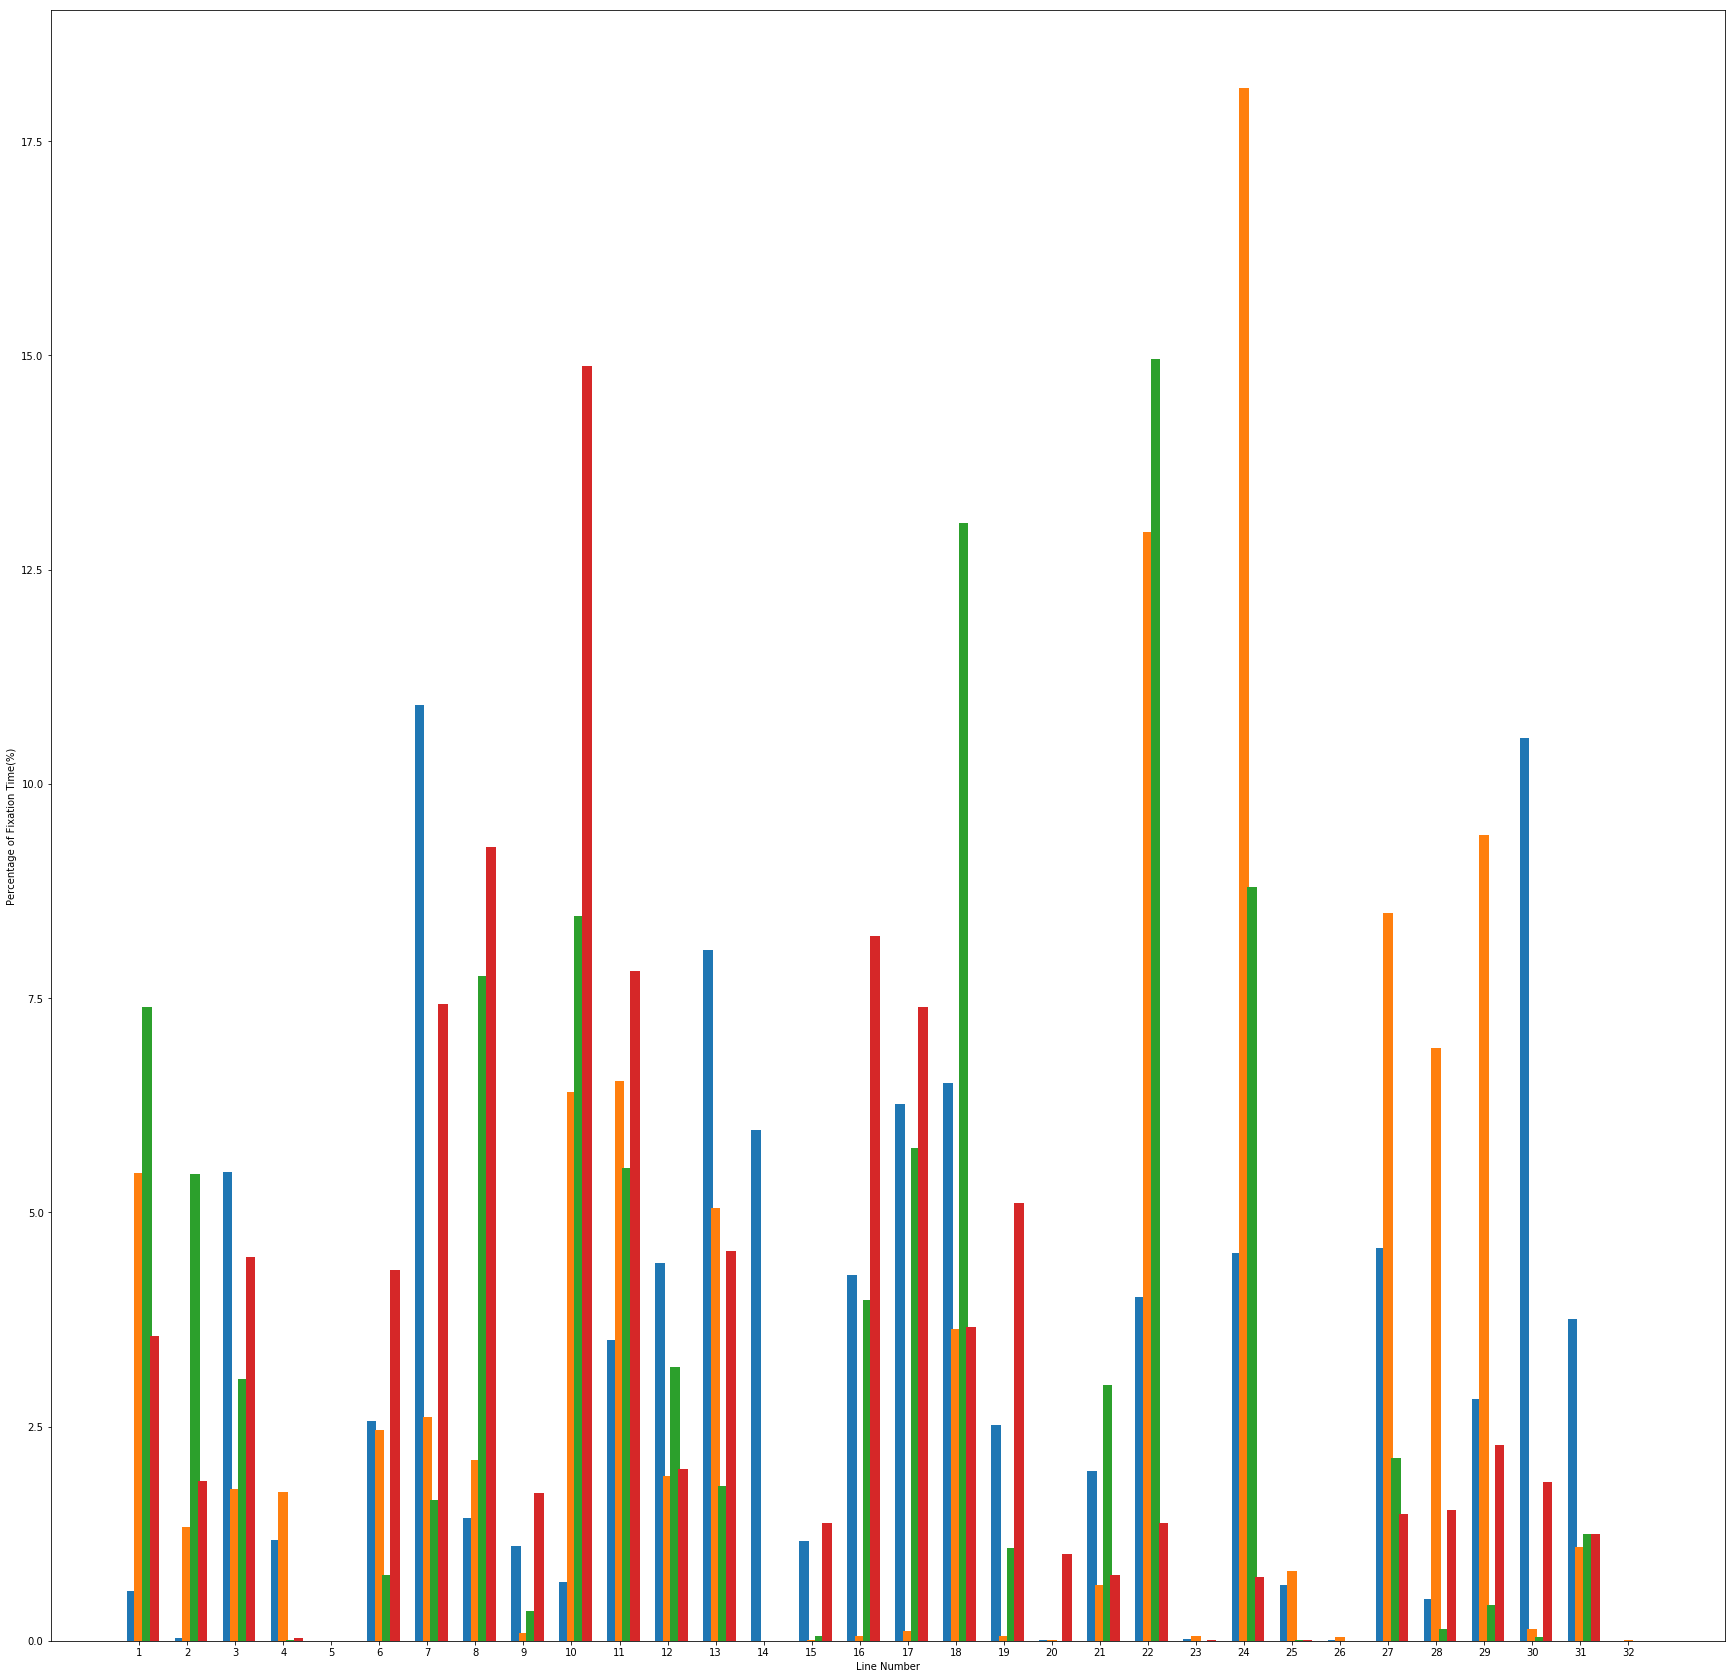

In [89]:
plt.figure(figsize=(30,30))
for sub in range(NUM_SUBJECTS):
    if sub == 1:
        plt.bar(np.arange(LINES_ARMSTRONG)+sub*0.16,np.array(armstrong_gaze_all_perc[sub])*100,width=0.2,tick_label=np.arange(LINES_ARMSTRONG)+1)
    else:
        plt.bar(np.arange(LINES_ARMSTRONG)+sub*0.16,np.array(armstrong_gaze_all_perc[sub])*100,width=0.2)
    plt.xlabel("Line Number")
    plt.ylabel("Percentage of Fixation Time(%)")
    plt.savefig("./plots/gazetimes/armstrong/percent_fixation_all_arms.png")

NOTE: Line Numbers 22 and 24 (which have very high fixation % but NOT marked important) are the printf statements which have text data written inside them.

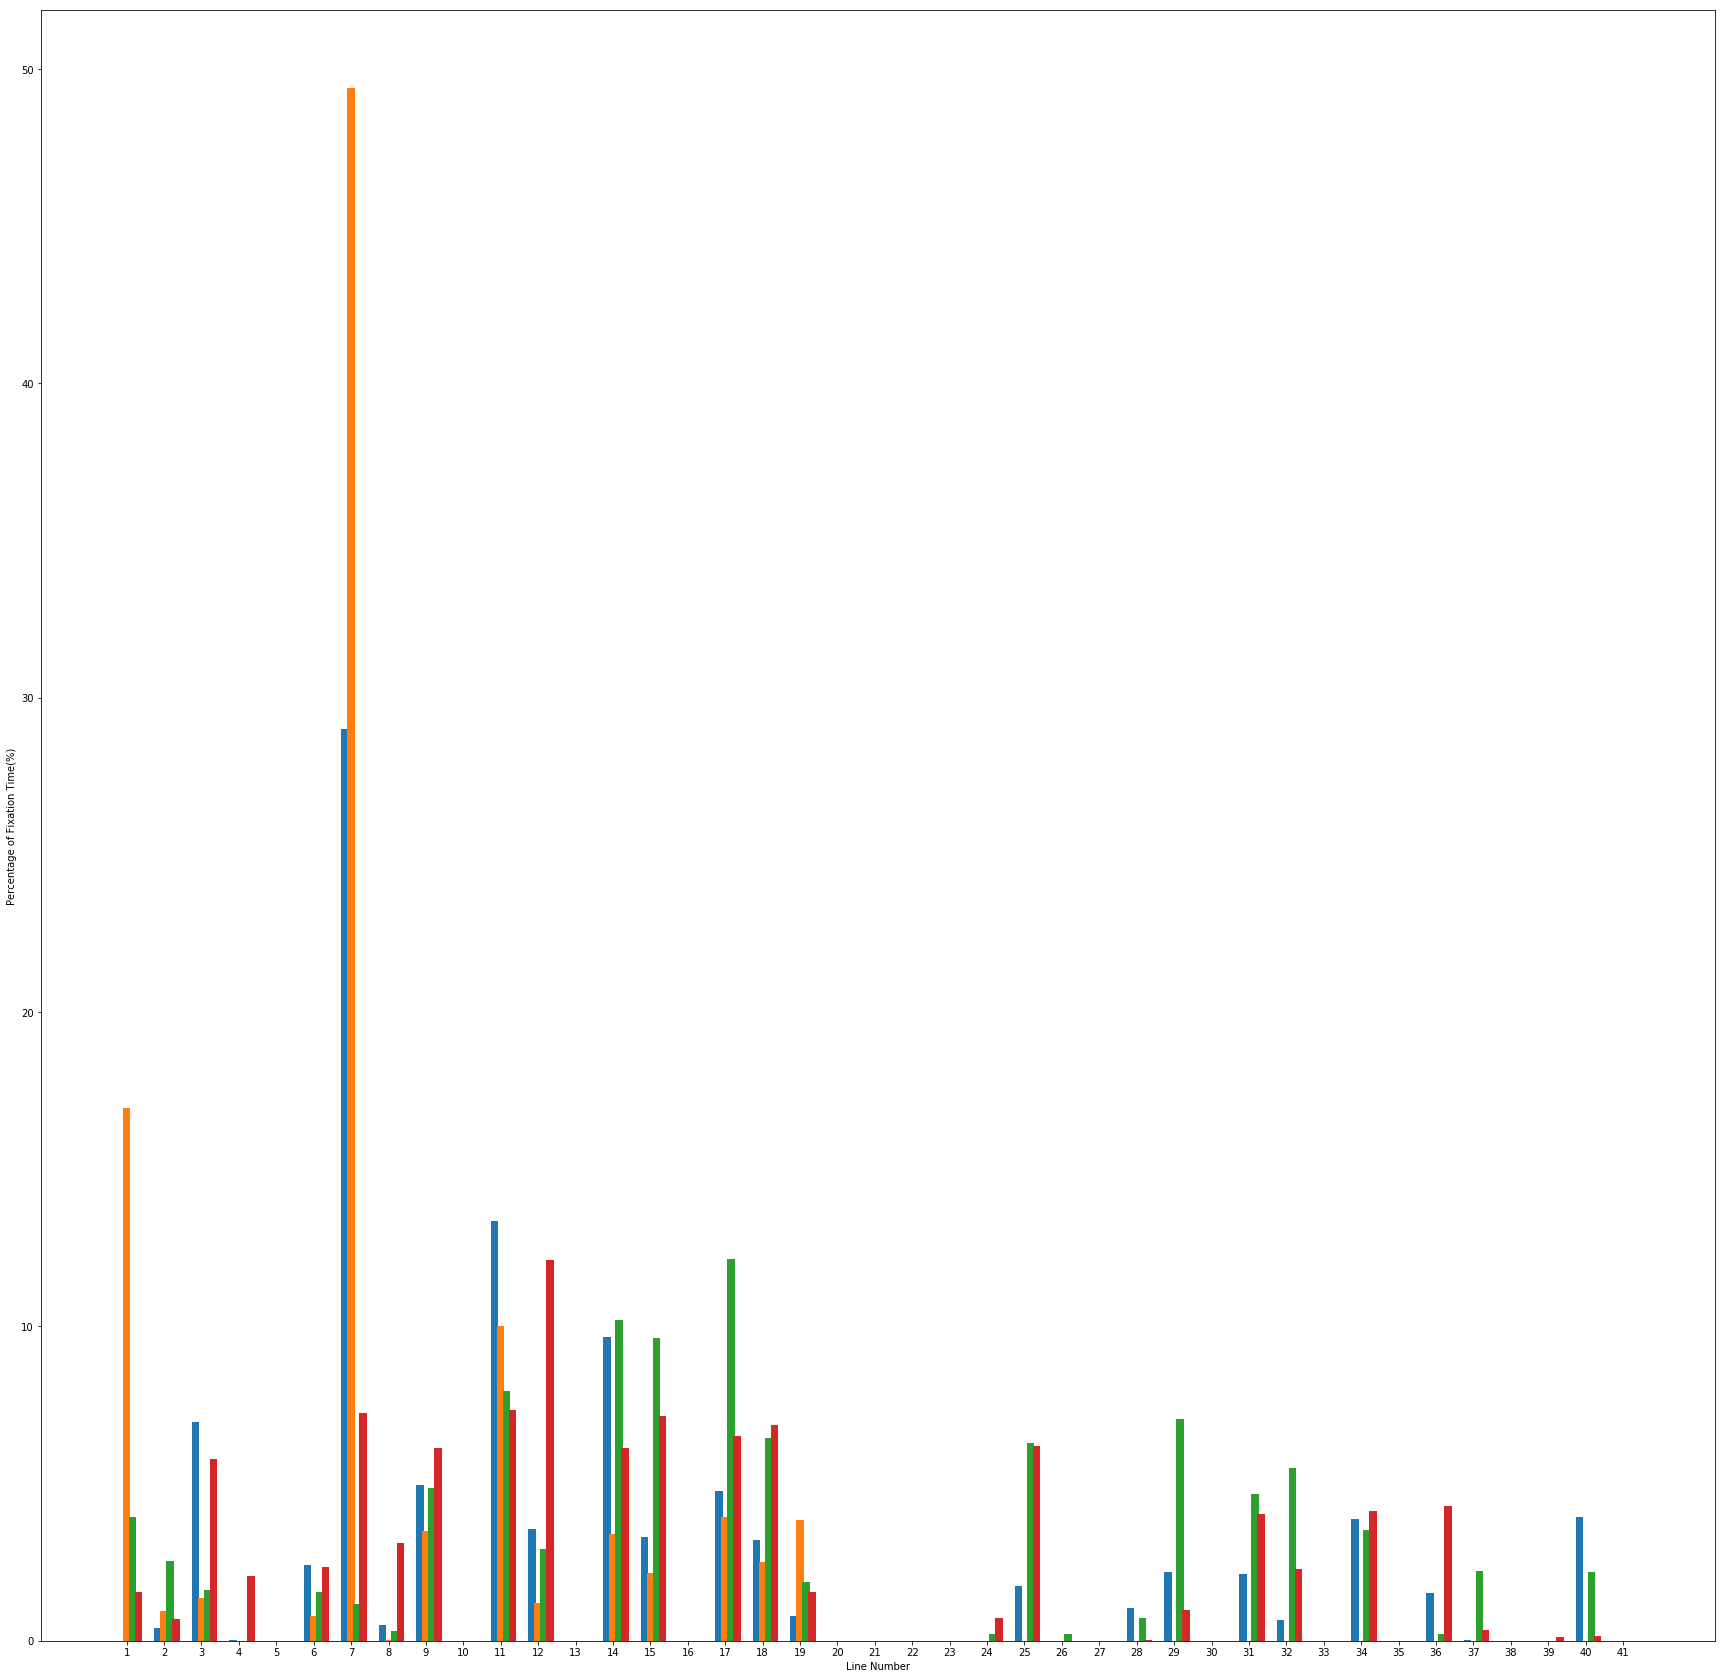

In [91]:
plt.figure(figsize=(30,30))
for sub in range(NUM_SUBJECTS):
    if sub == 1:
        plt.bar(np.arange(LINES_PRIME)+sub*0.16,np.array(prime_gaze_all_perc[sub])*100,width=0.2,tick_label=np.arange(LINES_PRIME)+1)
    else:
        plt.bar(np.arange(LINES_PRIME)+sub*0.16,np.array(prime_gaze_all_perc[sub])*100,width=0.2)
    plt.xlabel("Line Number")
    plt.ylabel("Percentage of Fixation Time(%)")
    plt.savefig("./plots/gazetimes/prime/percent_fixation_all_prime.png")

NOTE: Line Numbers 7 (which have very high fixation % but NOT marked important) is a printf statement which has text data written inside it.